# Driving Credit Card Engagement: Sales Performance and Client Personas at RevoBank

# Milestone 1: Data Cleaning and Preparation

## Card Data Checking


In [1]:
import pandas as pd

#inputing and making dataframe for card data
card_data = 'https://drive.google.com/file/d/1uNAJ4D5rPYvXgn3htzln7VfK9vHFRq0x/view?usp=sharing'
card = 'https://drive.google.com/uc?id='+ card_data.split('/')[-2]

card_df = pd.read_csv(card)
card_df

id  client_id  card_brand       card_number  expires  cvv  \
0        0       1362        Amex   393314135668401  04/2030  866   
1        1        550  Mastercard  5278231764792292  06/2030  396   
2        2        556  Mastercard  5889825928297675  09/2027  422   
3        3       1937        Visa  4289888672554714  04/2026  736   
4        4       1981  Mastercard  5433366978583845  03/2030  530   
...    ...        ...         ...               ...      ...  ...   
5594  4508       1190       Visa   4227482000380763  07/2028  795   
5595   209       1334       Visa   4144931322114018  02/2029  312   
5596  2711        185       Visa   4718517475996018  01/2027  492   
5597  1161       1891       Visa   4268017872699469  08/2031  476   
5598  6115        921       Visa   4816027381867141  11/2029  163   

      credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
0     Rp53.189.000        01/1996                   2019                   17   
1     Rp18.200.000        01/1999                   2018                   27   
2     Rp31.298.000        01/2000                   2016                   20   
3     Rp25.732.000        01/2000                   2020                    7   
4     Rp30.500.000        01/2002                   2012                   14   
...            ...            ...                    ...                  ...   
5594   Rp7.301.000        09/2005                   2012                    5   
5595  Rp14.592.000        01/2014                   2014                   32   
5596   Rp8.943.000        04/2017                   2017                   14   
5597  Rp23.891.000        02/2013                   2020                   12   
5598  Rp35.623.000        12/2020                   2020                   15   

      count_nonfraud_trx_L6M amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
0                      181.0        Rp177.057.300                  NaN   
1                      148.0        Rp135.687.100                  NaN   
2                      415.0        Rp186.723.300                  NaN   
3                      148.0        Rp207.881.500                  NaN   
4                       48.0         Rp28.007.500                  NaN   
...                      ...                  ...                  ...   
5594                   320.0        Rp196.255.900                  NaN   
5595                    41.0         Rp51.009.700                  NaN   
5596                   198.0         Rp89.850.000                  NaN   
5597                    96.0         Rp43.768.500                  NaN   
5598                    39.0         Rp53.889.900                  NaN   

     amt_fraud_trx_L6M  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
5594               NaN  
5595               NaN  
5596               NaN  
5597               NaN  
5598               NaN  

[5599 rows x 14 columns]

*There are 5599 rows and 14 columns of raw card data*

### Check Data Type

In [2]:
#Checking card_df info in general, check data type
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5599 non-null   int64  
 1   client_id               5599 non-null   int64  
 2   card_brand              5599 non-null   object 
 3   card_number             5599 non-null   int64  
 4   expires                 5599 non-null   object 
 5   cvv                     5599 non-null   int64  
 6   credit_limit            5587 non-null   object 
 7   acct_open_date          5599 non-null   object 
 8   year_pin_last_changed   5599 non-null   int64  
 9   days_since_last_trx     5599 non-null   int64  
 10  count_nonfraud_trx_L6M  3707 non-null   float64
 11  amt_nonfraud_trx_L6M    3707 non-null   object 
 12  count_fraud_trx_L6M     547 non-null    float64
 13  amt_fraud_trx_L6M       547 non-null    object 
dtypes: float64(2), int64(6), object(6)
memor

*Type Data Adjustment Needed:*
1.   *ID and Client ID must be converted to String (str) -> so that they are not aggregated when processing numeric data.*
2.   *Credit limit, non-fraud transaction amount, and fraud transaction amount need to be changed to float -> because they are monetary values, which require decimal representation for accurate calculations. Non-numerical characters such as "Rp." must also be removed beforehand*
3. *Count nonfraud and fraud trx must be converted to integer (int) -> because they represent count data, which should be stored as integers for accurate counting and aggregation.*
4. *Expires date and open acct date must be converted to datetime -> because date is time-based data that requires the datetime type for accurate calculations and analysis.*


### Check Typo Card Brand

In [3]:
#Checking typo for card_brand name
print(card_df['card_brand'].value_counts())

card_brand
Mastercard    2826
Visa          2093
Amex           402
JCB            206
Visa            69
Jcb              3
Name: count, dtype: int64


*There are two JCB(Jcb) and Visa cards, so they need to be combined to make them uniform and organized.*

### Check Missing Values

In [4]:
#Checking Missing values
card_df.isnull().sum()

id                           0
client_id                    0
card_brand                   0
card_number                  0
expires                      0
cvv                          0
credit_limit                12
acct_open_date               0
year_pin_last_changed        0
days_since_last_trx          0
count_nonfraud_trx_L6M    1892
amt_nonfraud_trx_L6M      1892
count_fraud_trx_L6M       5052
amt_fraud_trx_L6M         5052
dtype: int64

*There are missing values in credit_limit, count fraud&non trx, and amount fraud&nonfraud trx.*

In [5]:
# Showing all NaN credit_limit
card_df[card_df['credit_limit'].isna()]

id  client_id  card_brand       card_number  expires  cvv  \
696    782       1658        Visa  4351530526237151  02/2024  164   
2309  2559        165  Mastercard  5283475217390040  08/2016  149   
2744  3033       1614        Visa  4605207086612818  05/2024  438   
3291  3626        870        Amex   349088998842560  04/2024  652   
3756  4137       1348  Mastercard  5792498646569711  03/2024  554   
3915  4318        668  Mastercard  5764603958082866  07/2022  397   
3929  4334       1514  Mastercard  5052545011580809  06/2022  940   
4142  4564        274        Visa  4636302289774996  09/2020  898   
4180  4610       1306  Mastercard  5600916670945192  04/2025  252   
4877  5389        373  Mastercard  5435311573918660  02/2023   45   
5136  5680        214        Visa  4159886669620519  09/2023  693   
5228  5781       1942  Mastercard  5622083190963613  10/2024  770   

     credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
696           NaN        02/2018                   2025                  604   
2309          NaN        08/2010                   2019                  604   
2744          NaN        05/2014                   2014                  604   
3291          NaN        04/2018                   2023                  400   
3756          NaN        08/2009                   2014                  604   
3915          NaN        08/2015                   2015                  604   
3929          NaN        08/2015                   2015                  604   
4142          NaN        09/2009                   2015                  604   
4180          NaN        09/2011                   2015                  604   
4877          NaN        11/2008                   2017                  604   
5136          NaN        11/2017                   2017                  604   
5228          NaN        12/2007                   2014                  434   

      count_nonfraud_trx_L6M amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
696                      NaN                  NaN                  NaN   
2309                     NaN                  NaN                  NaN   
2744                     NaN                  NaN                  NaN   
3291                     NaN                  NaN                  NaN   
3756                     NaN                  NaN                  NaN   
3915                     NaN                  NaN                  NaN   
3929                     NaN                  NaN                  NaN   
4142                     NaN                  NaN                  NaN   
4180                     NaN                  NaN                  NaN   
4877                     NaN                  NaN                  NaN   
5136                     NaN                  NaN                  NaN   
5228                     NaN                  NaN                  NaN   

     amt_fraud_trx_L6M  
696                NaN  
2309               NaN  
2744               NaN  
3291               NaN  
3756               NaN  
3915               NaN  
3929               NaN  
4142               NaN  
4180               NaN  
4877               NaN  
5136               NaN  
5228               NaN

### Check Data Duplicated

In [6]:
#Checking cards duplicated data
card_df[
    card_df['id'].duplicated()
]

id  client_id card_brand       card_number  expires  cvv  \
5568  2347        601      Visa   4000370059012165  11/2030   22   
5569  2720         73      Visa   4782359944930749  06/2030   12   
5570  2893       1759      Visa   4174613161615032  10/2030  977   
5571  5353       1561      Visa   4243596342751426  07/2028  687   
5572  4350       1123      Visa   4292936340098046  02/2029  106   
5573  3456         48      Visa   4456924264973452  03/2030  483   
5574  5515       1422      Visa   4103248264872952  07/2031   23   
5575  4867        157      Visa   4884544538827906  07/2027  296   
5576  4972       1308      Visa   4900994567069763  07/2027   24   
5577  1981        136      Visa   4270247503047583  08/2029  977   
5578    24       1274      Visa   4181524038316536  04/2027    2   
5579  5470        460      Visa   4858755901764608  10/2026  766   
5580  1860        975      Visa   4039295566770817  05/2027  214   
5581   374       1115      Visa   4906405312400640  02/2029  579   
5582   749         54      Visa   4557061225558443  05/2029  780   
5583  4167       1875      Visa   4557993037807765  06/2030  133   
5584  1781       1372      Visa   4806267788873524  08/2026  289   
5585  1915       1933      Visa   4146946026841288  02/2026   69   
5586  3080       1969      Visa   4288810793226677  03/2027  453   
5587  2352       1509      Visa   4417739183409950  01/2029  990   
5588  2437         40      Visa   4299508349741779  09/2027  579   
5589  1964       1126      Visa   4224143942174854  03/2028    4   
5590  5393        154      Visa   4900806445604257  01/2030   23   
5591    20       1728      Visa   4665365862082531  06/2027  412   
5592  3875        699      Visa   4029109059179282  08/2030  637   
5593  5296       1178      Visa   4410685608952637  06/2030  265   
5594  4508       1190      Visa   4227482000380763  07/2028  795   
5595   209       1334      Visa   4144931322114018  02/2029  312   
5596  2711        185      Visa   4718517475996018  01/2027  492   
5597  1161       1891      Visa   4268017872699469  08/2031  476   
5598  6115        921      Visa   4816027381867141  11/2029  163   

      credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
5568   Rp8.473.000        03/2020                   2020                   29   
5569  Rp27.068.000        04/2018                   2018                    7   
5570  Rp17.259.000        05/2010                   2025                   19   
5571   Rp4.271.000        11/2002                   2021                    4   
5572   Rp2.187.000        08/2015                   2020                    4   
5573  Rp15.845.000        06/2014                   2018                    8   
5574  Rp10.184.000        11/2012                   2018                    3   
5575  Rp21.084.000        01/2015                   2018                    9   
5576  Rp23.221.000        10/2007                   2017                  604   
5577  Rp38.605.000        08/2023                   2025                  604   
5578  Rp23.786.000        01/2006                   2012                    4   
5579  Rp13.286.000        11/2011                   2015                   27   
5580  Rp11.336.000        05/2021                   2025                  604   
5581  Rp15.566.000        01/2023                   2023                   36   
5582  Rp22.300.000        05/2023                   2025                  604   
5583  Rp25.992.000        08/2010                   2014                    3   
5584   Rp9.257.000        08/2020                   2025                  604   
5585   Rp3.285.000        02/2020                   2025                  604   
5586   Rp4.732.000        05/2015                   2016                    8   
5587  Rp28.459.000        03/2020                   2020                    2   
5588   Rp2.294.000        04/2007                   2018                   23   
5589  Rp31.879.000        03/2022                

### Dirty Data Findings in Card Data

| Findings | Plan of Actions |
|---|---|
| ID & Client ID not in string format | astype(str)|
| Count trx fraud & Non fraud not in integer format | astype(int)|
| Credit Limit, Amount trx fraud & Non fraud not in float format | astype(float)|
| Expires date not in time series format | card_df['expires'] = pd.to_datetime(card_df['expires'], format='%m/%Y')|
| Account opening date not in time series format |  card_df['acct_open_date'] = pd.to_datetime(card_df['acct_open_date'], format='%m/%Y') |
| There are typo in card_brand column | fix typo with replace |
| There are missing values in credit limit column | impute with 0 fillna(0) |
| There are missing values in count&amt fraud/non trx column | impute with 0 fillna(0)|
| There are cards duplicated data | drop_duplicates(subset ='id') |
| There are expired card | remove expired card with filter card_df['expires'] >= '2025-06-01' |
| There are card with 0 credit limit | remove card with 0 credit_limit using filter card_df['credit limit'] > 0 |
| Need Non-numeric (Rp.) and separator cleaning | str.replace('Rp.', '', regex=False) |

## Card Data Cleaning

In [7]:
#Cleaning Card Data
#Make a copy from Card Data for cleaning purpose

card_copy = card_df.copy()
card_copy.head()

id  client_id  card_brand       card_number  expires  cvv  credit_limit  \
0   0       1362        Amex   393314135668401  04/2030  866  Rp53.189.000   
1   1        550  Mastercard  5278231764792292  06/2030  396  Rp18.200.000   
2   2        556  Mastercard  5889825928297675  09/2027  422  Rp31.298.000   
3   3       1937        Visa  4289888672554714  04/2026  736  Rp25.732.000   
4   4       1981  Mastercard  5433366978583845  03/2030  530  Rp30.500.000   

  acct_open_date  year_pin_last_changed  days_since_last_trx  \
0        01/1996                   2019                   17   
1        01/1999                   2018                   27   
2        01/2000                   2016                   20   
3        01/2000                   2020                    7   
4        01/2002                   2012                   14   

   count_nonfraud_trx_L6M amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
0                   181.0        Rp177.057.300                  NaN   
1                   148.0        Rp135.687.100                  NaN   
2                   415.0        Rp186.723.300                  NaN   
3                   148.0        Rp207.881.500                  NaN   
4                    48.0         Rp28.007.500                  NaN   

  amt_fraud_trx_L6M  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

*We use this card_copy dataframe for the cleaning process.*

In [8]:
# Correcting id and client_id data type (from integer to string)
card_copy[['id', 'client_id']] = card_copy[['id', 'client_id']].astype(str)

# Correcting expires and acct_open_date data type (from string to datetime)
card_copy[['expires', 'acct_open_date']] = card_copy[['expires', 'acct_open_date']].apply(pd.to_datetime, format='%m/%Y')

print(card_copy.dtypes)


id                                object
client_id                         object
card_brand                        object
card_number                        int64
expires                   datetime64[ns]
cvv                                int64
credit_limit                      object
acct_open_date            datetime64[ns]
year_pin_last_changed              int64
days_since_last_trx                int64
count_nonfraud_trx_L6M           float64
amt_nonfraud_trx_L6M              object
count_fraud_trx_L6M              float64
amt_fraud_trx_L6M                 object
dtype: object


In [9]:
#Drop Duplicated Data Cards ID
card_copy = card_copy.drop_duplicates(subset=['id'])
card_copy.shape

(5568, 14)

*31 rows duplicated card data dropped: remaining 5568 rows, 14 columns card data*

In [10]:
#Checking card brand difference specifically
card_copy['card_brand'].unique()

array(['Amex', 'Mastercard', 'Visa', 'JCB', 'Visa ', 'Jcb'], dtype=object)

*Replace 'Jcb' into 'JCB' & 'Visa ' into 'Visa'*

In [11]:
#Fixing Card Brand Typo
card_copy['card_brand']=card_copy['card_brand'].replace('Jcb','JCB')
card_copy['card_brand']=card_copy['card_brand'].replace('Visa ','Visa')
print(card_copy['card_brand'].value_counts())

card_brand
Mastercard    2826
Visa          2131
Amex           402
JCB            209
Name: count, dtype: int64


In [12]:
#Deleting Non-numerical Symbol
card_copy[['credit_limit', 'amt_nonfraud_trx_L6M', 'amt_fraud_trx_L6M']] = (
    card_copy[['credit_limit', 'amt_nonfraud_trx_L6M', 'amt_fraud_trx_L6M']]
    .apply(lambda col: col.str.replace('Rp', '', regex=False))     # Delete 'Rp'
    .apply(lambda col: col.str.replace('.', '', regex=False))      # Delete .
    .apply(lambda col: col.str.strip())                            # Delete space
)

print(card_copy[['credit_limit', 'amt_nonfraud_trx_L6M', 'amt_fraud_trx_L6M']].head(10))

  credit_limit amt_nonfraud_trx_L6M amt_fraud_trx_L6M
0     53189000            177057300               NaN
1     18200000            135687100               NaN
2     31298000            186723300               NaN
3     25732000            207881500               NaN
4     30500000             28007500               NaN
5     34334000             65672000               NaN
6     14749000                  NaN               NaN
7     15163000                  NaN               NaN
8     16161000            180217100               NaN
9     20397000            162598100               NaN


In [13]:
# Showing all NaN credit_limit
card_copy[card_copy['credit_limit'].isna()]

id client_id  card_brand       card_number    expires  cvv  \
696    782      1658        Visa  4351530526237151 2024-02-01  164   
2309  2559       165  Mastercard  5283475217390040 2016-08-01  149   
2744  3033      1614        Visa  4605207086612818 2024-05-01  438   
3291  3626       870        Amex   349088998842560 2024-04-01  652   
3756  4137      1348  Mastercard  5792498646569711 2024-03-01  554   
3915  4318       668  Mastercard  5764603958082866 2022-07-01  397   
3929  4334      1514  Mastercard  5052545011580809 2022-06-01  940   
4142  4564       274        Visa  4636302289774996 2020-09-01  898   
4180  4610      1306  Mastercard  5600916670945192 2025-04-01  252   
4877  5389       373  Mastercard  5435311573918660 2023-02-01   45   
5136  5680       214        Visa  4159886669620519 2023-09-01  693   
5228  5781      1942  Mastercard  5622083190963613 2024-10-01  770   

     credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
696           NaN     2018-02-01                   2025                  604   
2309          NaN     2010-08-01                   2019                  604   
2744          NaN     2014-05-01                   2014                  604   
3291          NaN     2018-04-01                   2023                  400   
3756          NaN     2009-08-01                   2014                  604   
3915          NaN     2015-08-01                   2015                  604   
3929          NaN     2015-08-01                   2015                  604   
4142          NaN     2009-09-01                   2015                  604   
4180          NaN     2011-09-01                   2015                  604   
4877          NaN     2008-11-01                   2017                  604   
5136          NaN     2017-11-01                   2017                  604   
5228          NaN     2007-12-01                   2014                  434   

      count_nonfraud_trx_L6M amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
696                      NaN                  NaN                  NaN   
2309                     NaN                  NaN                  NaN   
2744                     NaN                  NaN                  NaN   
3291                     NaN                  NaN                  NaN   
3756                     NaN                  NaN                  NaN   
3915                     NaN                  NaN                  NaN   
3929                     NaN                  NaN                  NaN   
4142                     NaN                  NaN                  NaN   
4180                     NaN                  NaN                  NaN   
4877                     NaN                  NaN                  NaN   
5136                     NaN                  NaN                  NaN   
5228                     NaN                  NaN                  NaN   

     amt_fraud_trx_L6M  
696                NaN  
2309               NaN  
2744               NaN  
3291               NaN  
3756               NaN  
3915               NaN  
3929               NaN  
4142               NaN  
4180               NaN  
4877               NaN  
5136               NaN  
5228               NaN

*There are 12 cards with credit limit = NaN (Missing values) will impute with 0*

In [14]:
#Checking credit limit = 0
card_copy[card_copy['credit_limit'] == '0']

id client_id  card_brand       card_number    expires  cvv  \
51      54      1364  Mastercard  5673928924089109 2022-01-01  821   
87      96        81  Mastercard  5810850276328483 2023-01-01  877   
242    265        37         JCB  6845375674595536 2023-02-01  943   
808    905      1224        Visa  4425499865708805 2024-05-01  933   
1076  1202       590        Amex   361343872480844 2016-09-01  837   
1295  1436       144        Amex   375207905449012 2023-04-01  512   
1620  1799       934        Visa  4159426139130545 2024-04-01  640   
1868  2075      1972        Amex   382031359848619 2018-08-01  412   
1870  2077      1414         JCB  6669631772050778 2018-03-01  182   
1895  2105       649         JCB  6267383831462523 2022-07-01  640   
2172  2411      1364        Visa  4696206742094892 2023-09-01   52   
2441  2707       132        Visa  4832180811213555 2023-09-01  231   
2607  2885      1202  Mastercard  5690597003085826 2023-02-01  546   
2794  3086      1348        Amex   313148408217973 2024-11-01  576   
2886  3182        15        Visa  4885936439907966 2022-08-01  161   
2887  3183       318        Visa  4949255212004884 2024-05-01  520   
3118  3443       846        Visa  4518067619451768 2023-12-01  429   
3302  3642      1181  Mastercard  5772874140116142 2024-05-01  811   
3320  3662       484        Amex   385811228095330 2025-03-01  173   
4300  4744      1996        Visa  4339413642488223 2018-12-01   77   
4509  4982      1348         JCB  6283858533446011 2024-09-01  427   
4736  5233       582  Mastercard  5000642222050149 2022-01-01  949   
4764  5264      1770        Visa  4908479439696234 2025-01-01  597   
5395  5957      1975  Mastercard  5320022308833354 2023-06-01   92   
5507  6081      1260        Amex   362698516441740 2022-05-01  439   

     credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
51              0     2009-01-01                   2013                  604   
87              0     2011-01-01                   2017                  604   
242             0     2016-01-01                   2016                  604   
808             0     2018-05-01                   2025                  604   
1076            0     2010-09-01                   2017                  604   
1295            0     2017-04-01                   2025                  604   
1620            0     2018-04-01                   2025                  604   
1868            0     2010-03-01                   2018                  604   
1870            0     2010-03-01                   2013                  604   
1895            0     2011-03-01                   2013                  604   
2172            0     2005-04-01                   2016                  604   
2441            0     2017-04-01                   2017                  604   
2607            0     2010-05-01                   2017                  604   
2794            0     2016-05-01                   2016                  182   
2886            0     2016-08-01                   2021                  604   
2887            0     2018-05-01                   2021                  604   
3118            0     2014-06-01                   2016                  604   
3302            0     2018-05-01                   2024                  398   
3320            0     2006-07-01                   2014                  604   
4300            0     2012-12-01                   2022                  604   
4509            0     2008-10-01                   2012                  245   
4736            0     2016-10-01                   2019                  604   
4764            0     2017-10-01                   2017                  126   
5395            0     2014-12-01                   2015                  604   
5507            0     2016-05-01                   2018                  604   

      count_nonfraud_trx_L6M amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
51                       NaN    

In [15]:
print((pd.to_numeric(card_copy['credit_limit'], errors='coerce') == 0).sum())

25


*There are 25 cards that already have credit limit = 0*

In [16]:
#Missing values in transaction imputed with 0, meaning no transaction detected
#Also missing values in credit limit imputed with 0 (will be deleted later)
#We don't delete the transaction column even it has a lot of Null/NaN, because we want to analyze the transaction behavior

cols_to_fill = [
    'credit_limit',
    'count_nonfraud_trx_L6M',
    'amt_nonfraud_trx_L6M',
    'count_fraud_trx_L6M',
    'amt_fraud_trx_L6M'
]

card_copy[cols_to_fill] = card_copy[cols_to_fill].fillna(0)
card_copy.isna().sum()


id                        0
client_id                 0
card_brand                0
card_number               0
expires                   0
cvv                       0
credit_limit              0
acct_open_date            0
year_pin_last_changed     0
days_since_last_trx       0
count_nonfraud_trx_L6M    0
amt_nonfraud_trx_L6M      0
count_fraud_trx_L6M       0
amt_fraud_trx_L6M         0
dtype: int64

In [17]:
# Correcting count_nonfraud_trx_L6M and count_fraud_trx_L6M data type (from float to integer)
card_copy[['count_nonfraud_trx_L6M', 'count_fraud_trx_L6M']] = card_copy[['count_nonfraud_trx_L6M', 'count_fraud_trx_L6M']].astype(int)

# Correcting credit_limit, amt_nonfraud_trx_L6M and amt_fraud_trx_L6M data type (from string to float)
card_copy[['credit_limit', 'amt_nonfraud_trx_L6M', 'amt_fraud_trx_L6M']] =   card_copy[['credit_limit', 'amt_nonfraud_trx_L6M', 'amt_fraud_trx_L6M']].astype(float)

In [18]:
card_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5568 entries, 0 to 5567
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      5568 non-null   object        
 1   client_id               5568 non-null   object        
 2   card_brand              5568 non-null   object        
 3   card_number             5568 non-null   int64         
 4   expires                 5568 non-null   datetime64[ns]
 5   cvv                     5568 non-null   int64         
 6   credit_limit            5568 non-null   float64       
 7   acct_open_date          5568 non-null   datetime64[ns]
 8   year_pin_last_changed   5568 non-null   int64         
 9   days_since_last_trx     5568 non-null   int64         
 10  count_nonfraud_trx_L6M  5568 non-null   int64         
 11  amt_nonfraud_trx_L6M    5568 non-null   float64       
 12  count_fraud_trx_L6M     5568 non-null   int64        

In [19]:
card_copy[['credit_limit', 'amt_nonfraud_trx_L6M', 'amt_fraud_trx_L6M']].head()

credit_limit  amt_nonfraud_trx_L6M  amt_fraud_trx_L6M
0    53189000.0           177057300.0                0.0
1    18200000.0           135687100.0                0.0
2    31298000.0           186723300.0                0.0
3    25732000.0           207881500.0                0.0
4    30500000.0            28007500.0                0.0

In [20]:
#Filter expired card (card with expires date < analysis date (31 May 2025))
#Which means, not expired card >= 06/2025
expired_cards = card_copy[
    card_copy['expires'] < '2025-06-01'
]
expired_cards

id client_id  card_brand       card_number    expires  cvv  \
51      54      1364  Mastercard  5673928924089109 2022-01-01  821   
87      96        81  Mastercard  5810850276328483 2023-01-01  877   
242    265        37         JCB  6845375674595536 2023-02-01  943   
696    782      1658        Visa  4351530526237151 2024-02-01  164   
808    905      1224        Visa  4425499865708805 2024-05-01  933   
1076  1202       590        Amex   361343872480844 2016-09-01  837   
1295  1436       144        Amex   375207905449012 2023-04-01  512   
1620  1799       934        Visa  4159426139130545 2024-04-01  640   
1868  2075      1972        Amex   382031359848619 2018-08-01  412   
1870  2077      1414         JCB  6669631772050778 2018-03-01  182   
1895  2105       649         JCB  6267383831462523 2022-07-01  640   
2172  2411      1364        Visa  4696206742094892 2023-09-01   52   
2309  2559       165  Mastercard  5283475217390040 2016-08-01  149   
2441  2707       132        Visa  4832180811213555 2023-09-01  231   
2607  2885      1202  Mastercard  5690597003085826 2023-02-01  546   
2744  3033      1614        Visa  4605207086612818 2024-05-01  438   
2794  3086      1348        Amex   313148408217973 2024-11-01  576   
2886  3182        15        Visa  4885936439907966 2022-08-01  161   
2887  3183       318        Visa  4949255212004884 2024-05-01  520   
3118  3443       846        Visa  4518067619451768 2023-12-01  429   
3291  3626       870        Amex   349088998842560 2024-04-01  652   
3302  3642      1181  Mastercard  5772874140116142 2024-05-01  811   
3320  3662       484        Amex   385811228095330 2025-03-01  173   
3756  4137      1348  Mastercard  5792498646569711 2024-03-01  554   
3915  4318       668  Mastercard  5764603958082866 2022-07-01  397   
3929  4334      1514  Mastercard  5052545011580809 2022-06-01  940   
4142  4564       274        Visa  4636302289774996 2020-09-01  898   
4180  4610      1306  Mastercard  5600916670945192 2025-04-01  252   
4300  4744      1996        Visa  4339413642488223 2018-12-01   77   
4409  4862        13        Visa  4846797588329543 2025-05-01  143   
4509  4982      1348         JCB  6283858533446011 2024-09-01  427   
4715  5211      1133        Visa  4332848097947146 2025-05-01  247   
4736  5233       582  Mastercard  5000642222050149 2022-01-01  949   
4764  5264      1770        Visa  4908479439696234 2025-01-01  597   
4877  5389       373  Mastercard  5435311573918660 2023-02-01   45   
5127  5667       839        Amex   359230628127716 2025-05-01  198   
5136  5680       214        Visa  4159886669620519 2023-09-01  693   
5228  5781      1942  Mastercard  5622083190963613 2024-10-01  770   
5395  5957      1975  Mastercard  5320022308833354 2023-06-01   92   
5507  6081      1260        Amex   362698516441740 2022-05-01  439   

      credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
51             0.0     2009-01-01                   2013                  604   
87             0.0     2011-01-01                   2017                  604   
242            0.0     2016-01-01                   2016                  604   
696            0.0     2018-02-01                   2025                  604   
808            0.0     2018-05-01                   2025                  604   
1076           0.0     2010-09-01                   2017                  604   
1295           0.0     2017-04-01                   2025                  604   
1620           0.0     2018-04-01                   2025                  604   
1868           0.0     2010-03-01                   2018                  604   
1870           0.0     2010-03-01                   2013                  604   
1895           0.0     2011-03-01                   2013                  604   
2172           0.0     2005-04-01                   2016                  604   
2309           0.0     2010-08-01                   2019                  604   
244

In [21]:
expired_cards.shape

(40, 14)

In [22]:
#Filter total card with credit limit = 0
limited_cards = card_copy[
    card_copy['credit_limit'] == 0
]
limited_cards

id client_id  card_brand       card_number    expires  cvv  \
51      54      1364  Mastercard  5673928924089109 2022-01-01  821   
87      96        81  Mastercard  5810850276328483 2023-01-01  877   
242    265        37         JCB  6845375674595536 2023-02-01  943   
696    782      1658        Visa  4351530526237151 2024-02-01  164   
808    905      1224        Visa  4425499865708805 2024-05-01  933   
1076  1202       590        Amex   361343872480844 2016-09-01  837   
1295  1436       144        Amex   375207905449012 2023-04-01  512   
1620  1799       934        Visa  4159426139130545 2024-04-01  640   
1868  2075      1972        Amex   382031359848619 2018-08-01  412   
1870  2077      1414         JCB  6669631772050778 2018-03-01  182   
1895  2105       649         JCB  6267383831462523 2022-07-01  640   
2172  2411      1364        Visa  4696206742094892 2023-09-01   52   
2309  2559       165  Mastercard  5283475217390040 2016-08-01  149   
2441  2707       132        Visa  4832180811213555 2023-09-01  231   
2607  2885      1202  Mastercard  5690597003085826 2023-02-01  546   
2744  3033      1614        Visa  4605207086612818 2024-05-01  438   
2794  3086      1348        Amex   313148408217973 2024-11-01  576   
2886  3182        15        Visa  4885936439907966 2022-08-01  161   
2887  3183       318        Visa  4949255212004884 2024-05-01  520   
3118  3443       846        Visa  4518067619451768 2023-12-01  429   
3291  3626       870        Amex   349088998842560 2024-04-01  652   
3302  3642      1181  Mastercard  5772874140116142 2024-05-01  811   
3320  3662       484        Amex   385811228095330 2025-03-01  173   
3756  4137      1348  Mastercard  5792498646569711 2024-03-01  554   
3915  4318       668  Mastercard  5764603958082866 2022-07-01  397   
3929  4334      1514  Mastercard  5052545011580809 2022-06-01  940   
4142  4564       274        Visa  4636302289774996 2020-09-01  898   
4180  4610      1306  Mastercard  5600916670945192 2025-04-01  252   
4300  4744      1996        Visa  4339413642488223 2018-12-01   77   
4509  4982      1348         JCB  6283858533446011 2024-09-01  427   
4736  5233       582  Mastercard  5000642222050149 2022-01-01  949   
4764  5264      1770        Visa  4908479439696234 2025-01-01  597   
4877  5389       373  Mastercard  5435311573918660 2023-02-01   45   
5136  5680       214        Visa  4159886669620519 2023-09-01  693   
5228  5781      1942  Mastercard  5622083190963613 2024-10-01  770   
5395  5957      1975  Mastercard  5320022308833354 2023-06-01   92   
5507  6081      1260        Amex   362698516441740 2022-05-01  439   

      credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
51             0.0     2009-01-01                   2013                  604   
87             0.0     2011-01-01                   2017                  604   
242            0.0     2016-01-01                   2016                  604   
696            0.0     2018-02-01                   2025                  604   
808            0.0     2018-05-01                   2025                  604   
1076           0.0     2010-09-01                   2017                  604   
1295           0.0     2017-04-01                   2025                  604   
1620           0.0     2018-04-01                   2025                  604   
1868           0.0     2010-03-01                   2018                  604   
1870           0.0     2010-03-01                   2013                  604   
1895           0.0     2011-03-01                   2013                  604   
2172           0.0     2005-04-01                   2016                  604   
2309           0.0     2010-08-01                   2019                  604   
2441           0.0     2017-04-01                   2017                  604   
2607           0.0     2010-05-01                   2017                  604   
2744           0.0     2014-05-01                  

In [23]:
limited_cards.shape

(37, 14)

*There are 37 cards with credit limit = 0*

*25 already 0, 12 from NaN imputed 0*

In [24]:
# Drop expired card (Before June 2025) and card with credit_limit = 0
card_copy = card_copy[
    (card_copy['expires'] >= '2025-06-01') &
    (card_copy['credit_limit'] > 0)
]
card_copy

id client_id  card_brand       card_number    expires  cvv  \
0        0      1362        Amex   393314135668401 2030-04-01  866   
1        1       550  Mastercard  5278231764792292 2030-06-01  396   
2        2       556  Mastercard  5889825928297675 2027-09-01  422   
3        3      1937        Visa  4289888672554714 2026-04-01  736   
4        4      1981  Mastercard  5433366978583845 2030-03-01  530   
...    ...       ...         ...               ...        ...  ...   
5563  6141       715  Mastercard  5369522792349411 2028-08-01  597   
5564  6142      1236  Mastercard  5791756986936871 2030-11-01  196   
5565  6143       253  Mastercard  5482273460029161 2030-07-01   79   
5566  6144       737  Mastercard  5413710543564908 2030-10-01  454   
5567  6145       682        Visa  4605950682175499 2026-08-01  517   

      credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
0       53189000.0     1996-01-01                   2019                   17   
1       18200000.0     1999-01-01                   2018                   27   
2       31298000.0     2000-01-01                   2016                   20   
3       25732000.0     2000-01-01                   2020                    7   
4       30500000.0     2002-01-01                   2012                   14   
...            ...            ...                    ...                  ...   
5563    57378000.0     2022-08-01                   2024                  604   
5564    19178000.0     2024-12-01                   2024                  604   
5565    38739000.0     2024-12-01                   2024                  604   
5566    10355000.0     2024-12-01                   2024                  604   
5567    25178000.0     2020-08-01                   2024                  604   

      count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
0                        181           177057300.0                    0   
1                        148           135687100.0                    0   
2                        415           186723300.0                    0   
3                        148           207881500.0                    0   
4                         48            28007500.0                    0   
...                      ...                   ...                  ...   
5563                       0                   0.0                    0   
5564                       0                   0.0                    0   
5565                       0                   0.0                    0   
5566                       0                   0.0                    0   
5567                       0                   0.0                    0   

      amt_fraud_trx_L6M  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
...                 ...  
5563                0.0  
5564                0.0  
5565                0.0  
5566                0.0  
5567                0.0  

[5528 rows x 14 columns]

In [25]:
# Checking if all limited card = expired card
all_limited_are_expired = (
    card_copy[card_copy['credit_limit'] == 0]['expires'] < '2025-06-01'
).all()

print("Have all limited cards expired?", all_limited_are_expired)


Have all limited cards expired? True


*Turns out, all limited credit cards already expired. Remaining 5528 rows 14 columns cleaned card data.*

In [26]:
#Rename and saving cleaned card data

card_cleaned = card_copy
card_cleaned.to_csv("card_cleaned.csv", index=False)

## User Data Checking

In [27]:
#inputing and making dataframe for user data
user_data = 'https://drive.google.com/file/d/1gNqgWaQA_t-2-w9_wsMbCkZnsCmRmeX6/view?usp=drive_link'
user = 'https://drive.google.com/uc?id='+ user_data.split('/')[-2]

user_df = pd.read_csv(user)
user_df

id  retirement_age   birthdate  gender per_capita_income  \
0      825              66  1972-11-25  Female      Rp45.937.000   
1     1746              68  1972-12-16  Female      Rp59.451.000   
2     1718              67  1944-11-04  Female      Rp35.586.000   
3      708              63  1963-01-12  Female     Rp255.975.000   
4     1164              70  1982-09-21    Male      Rp84.407.000   
...    ...             ...         ...     ...               ...   
1995   986              70  1993-07-06    Male      Rp36.950.000   
1996  1944              65  1963-11-12  Female      Rp37.998.000   
1997   185              67  1979-01-30  Female      Rp23.810.000   
1998  1007              60  1960-02-23    Male      Rp39.752.000   
1999  1110              60  2004-11-07  Female      Rp50.718.000   

      yearly_income    total_debt  credit_score  
0      Rp93.663.000  Rp38.138.095           787  
1     Rp121.212.000  Rp57.186.095           701  
2      Rp52.535.000      Rp58.666           698  
3     Rp392.132.000  Rp60.467.238           722  
4     Rp172.099.000  Rp54.946.285           675  
...             ...           ...           ...  
1995   Rp75.328.000  Rp26.250.666           703  
1996   Rp77.474.000  Rp31.224.571           740  
1997   Rp48.548.000  Rp21.238.666           779  
1998   Rp85.752.000   Rp8.141.142           618  
1999  Rp103.411.000  Rp54.171.238           673  

[2000 rows x 8 columns]

### Check Data Type

In [28]:
#Check info user data
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2000 non-null   int64 
 1   retirement_age     2000 non-null   int64 
 2   birthdate          2000 non-null   object
 3   gender             2000 non-null   object
 4   per_capita_income  2000 non-null   object
 5   yearly_income      2000 non-null   object
 6   total_debt         2000 non-null   object
 7   credit_score       2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 125.1+ KB


*Type Data Adjustment Needed:*
1.   *id must be converted to String (str) -> so that they are not aggregated when processing numeric data.*
2.   *birthdate must be converted to datetime -> because date is time-based data that requires the datetime type for accurate calculations and analysis.*
3.   *per_capita_income, yearly_income, and total_debt data type need to be changed to float -> because they are monetary values, which require decimal representation for accurate calculations. Non-numerical characters such as "Rp." must also be removed beforehand*



### Check Missing Values

In [29]:
#Checking missing values in user data
user_df.isnull().sum()

id                   0
retirement_age       0
birthdate            0
gender               0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
dtype: int64

*Yuhu! no missing values found in user data*

*We do not check for duplicate data because a user may have multiple cards.*

### Check Typo Gender

In [30]:
#Checking Typo in Gender Column
print(user_df['gender'].value_counts())

gender
Female    1016
Male       984
Name: count, dtype: int64


*No typo found in gender column.*

### Dirty Data Findings in User Data

| Findings | Plan of Actions |
|---|---|
| ID not in string format | astype(str)|
| per_capita_income, yearly_income, and total_debt not in float format | astype(float) |
| Need Non-numeric (Rp.) and separator cleaning | str.replace('Rp.', '', regex=False) |
| Birthdate not in time series format | user_df['birthdate'] = pd.to_datetime(user_df['birthdate'], format='%Y-%m-%d') |
| No Age data available | add column Age = 2025-05-31 - Birthdate |
| No Retired Flag data available | add column Retired Flag (user with  Age >= retirement_age) |
| No DTI data available | add column DTI = total_debt/yearly_income |

## User Data Cleaning

In [31]:
#Copy of User data for cleaning purpose
user_copy = user_df.copy()
user_copy

id  retirement_age   birthdate  gender per_capita_income  \
0      825              66  1972-11-25  Female      Rp45.937.000   
1     1746              68  1972-12-16  Female      Rp59.451.000   
2     1718              67  1944-11-04  Female      Rp35.586.000   
3      708              63  1963-01-12  Female     Rp255.975.000   
4     1164              70  1982-09-21    Male      Rp84.407.000   
...    ...             ...         ...     ...               ...   
1995   986              70  1993-07-06    Male      Rp36.950.000   
1996  1944              65  1963-11-12  Female      Rp37.998.000   
1997   185              67  1979-01-30  Female      Rp23.810.000   
1998  1007              60  1960-02-23    Male      Rp39.752.000   
1999  1110              60  2004-11-07  Female      Rp50.718.000   

      yearly_income    total_debt  credit_score  
0      Rp93.663.000  Rp38.138.095           787  
1     Rp121.212.000  Rp57.186.095           701  
2      Rp52.535.000      Rp58.666           698  
3     Rp392.132.000  Rp60.467.238           722  
4     Rp172.099.000  Rp54.946.285           675  
...             ...           ...           ...  
1995   Rp75.328.000  Rp26.250.666           703  
1996   Rp77.474.000  Rp31.224.571           740  
1997   Rp48.548.000  Rp21.238.666           779  
1998   Rp85.752.000   Rp8.141.142           618  
1999  Rp103.411.000  Rp54.171.238           673  

[2000 rows x 8 columns]

In [32]:
#Adjusting id data type into string
user_copy['id'] = user_copy['id'].astype(str)

#Adjusting birthdate data type (from string to datetime)
user_copy['birthdate'] = pd.to_datetime(user_copy['birthdate'], format='%Y-%m-%d')

In [33]:
#Making monetary list column to simplify
monetary_cols = [
    'per_capita_income',
    'yearly_income',
    'total_debt'
]

#Deleting Non-numerical Symbol
user_copy[monetary_cols] = (
    user_copy[monetary_cols]
    .astype(str)
    .apply(lambda col: col.str.replace('Rp', '', regex=False))
    .apply(lambda col: col.str.replace('.', '', regex=False))
    .apply(lambda col: col.str.strip())
)

#Adjusting per_capita_income, yearly_income, and total_debt data type into float format
user_copy[monetary_cols] = user_copy[monetary_cols].astype(float)
user_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2000 non-null   object        
 1   retirement_age     2000 non-null   int64         
 2   birthdate          2000 non-null   datetime64[ns]
 3   gender             2000 non-null   object        
 4   per_capita_income  2000 non-null   float64       
 5   yearly_income      2000 non-null   float64       
 6   total_debt         2000 non-null   float64       
 7   credit_score       2000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 125.1+ KB


*All data type already adjusted!*

In [34]:
#Check missing values again to ensure that the process of removing non-numeric symbols does not result in NaN
user_copy.isna().sum()

id                   0
retirement_age       0
birthdate            0
gender               0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
dtype: int64

In [35]:
from datetime import datetime

# Cutoff date
cutoff_date = datetime(2025, 5, 31)

# Counting and adding user age column
user_copy['user_age'] = (
    cutoff_date.year - user_copy['birthdate'].dt.year
    - ((user_copy['birthdate'].dt.month > cutoff_date.month) |
       ((user_copy['birthdate'].dt.month == cutoff_date.month) &
        (user_copy['birthdate'].dt.day > cutoff_date.day)))
)
user_copy.head()

id  retirement_age  birthdate  gender  per_capita_income  yearly_income  \
0   825              66 1972-11-25  Female         45937000.0     93663000.0   
1  1746              68 1972-12-16  Female         59451000.0    121212000.0   
2  1718              67 1944-11-04  Female         35586000.0     52535000.0   
3   708              63 1963-01-12  Female        255975000.0    392132000.0   
4  1164              70 1982-09-21    Male         84407000.0    172099000.0   

   total_debt  credit_score  user_age  
0  38138095.0           787        52  
1  57186095.0           701        52  
2     58666.0           698        80  
3  60467238.0           722        62  
4  54946285.0           675        42

In [36]:
#Making Retired Flag column (user with Age >= retirement_age)
user_copy['retired_flag'] = (
    user_copy['user_age'] >= user_copy['retirement_age']
)

user_copy.head()

id  retirement_age  birthdate  gender  per_capita_income  yearly_income  \
0   825              66 1972-11-25  Female         45937000.0     93663000.0   
1  1746              68 1972-12-16  Female         59451000.0    121212000.0   
2  1718              67 1944-11-04  Female         35586000.0     52535000.0   
3   708              63 1963-01-12  Female        255975000.0    392132000.0   
4  1164              70 1982-09-21    Male         84407000.0    172099000.0   

   total_debt  credit_score  user_age  retired_flag  
0  38138095.0           787        52         False  
1  57186095.0           701        52         False  
2     58666.0           698        80          True  
3  60467238.0           722        62         False  
4  54946285.0           675        42         False

In [37]:
#Counting debt to income ratio (DTI = total_debt/yearly_income)
user_copy['dti'] = (
    user_copy['total_debt']/user_copy['yearly_income']
).round(4)

user_copy.head()

id  retirement_age  birthdate  gender  per_capita_income  yearly_income  \
0   825              66 1972-11-25  Female         45937000.0     93663000.0   
1  1746              68 1972-12-16  Female         59451000.0    121212000.0   
2  1718              67 1944-11-04  Female         35586000.0     52535000.0   
3   708              63 1963-01-12  Female        255975000.0    392132000.0   
4  1164              70 1982-09-21    Male         84407000.0    172099000.0   

   total_debt  credit_score  user_age  retired_flag     dti  
0  38138095.0           787        52         False  0.4072  
1  57186095.0           701        52         False  0.4718  
2     58666.0           698        80          True  0.0011  
3  60467238.0           722        62         False  0.1542  
4  54946285.0           675        42         False  0.3193

In [38]:
user_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2000 non-null   object        
 1   retirement_age     2000 non-null   int64         
 2   birthdate          2000 non-null   datetime64[ns]
 3   gender             2000 non-null   object        
 4   per_capita_income  2000 non-null   float64       
 5   yearly_income      2000 non-null   float64       
 6   total_debt         2000 non-null   float64       
 7   credit_score       2000 non-null   int64         
 8   user_age           2000 non-null   int32         
 9   retired_flag       2000 non-null   bool          
 10  dti                2000 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int32(1), int64(2), object(2)
memory usage: 150.5+ KB


*The user data has been cleaned and completed with the additional columns needed (Age, Retired Flag, DTI). The data still consists of 2000 rows and 11 columns because nothing needs to be dropped from the data.*

In [39]:
#Rename and saving cleaned user data

user_cleaned = user_copy
user_cleaned.to_csv("user_cleaned.csv", index=False)

# Milestone 2: Exploratory Data Analysis

In [40]:
#Import Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load and make a copy of card cleaned data for EDA purpose
card_eda = card_cleaned.copy()
card_eda

id client_id  card_brand       card_number    expires  cvv  \
0        0      1362        Amex   393314135668401 2030-04-01  866   
1        1       550  Mastercard  5278231764792292 2030-06-01  396   
2        2       556  Mastercard  5889825928297675 2027-09-01  422   
3        3      1937        Visa  4289888672554714 2026-04-01  736   
4        4      1981  Mastercard  5433366978583845 2030-03-01  530   
...    ...       ...         ...               ...        ...  ...   
5563  6141       715  Mastercard  5369522792349411 2028-08-01  597   
5564  6142      1236  Mastercard  5791756986936871 2030-11-01  196   
5565  6143       253  Mastercard  5482273460029161 2030-07-01   79   
5566  6144       737  Mastercard  5413710543564908 2030-10-01  454   
5567  6145       682        Visa  4605950682175499 2026-08-01  517   

      credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
0       53189000.0     1996-01-01                   2019                   17   
1       18200000.0     1999-01-01                   2018                   27   
2       31298000.0     2000-01-01                   2016                   20   
3       25732000.0     2000-01-01                   2020                    7   
4       30500000.0     2002-01-01                   2012                   14   
...            ...            ...                    ...                  ...   
5563    57378000.0     2022-08-01                   2024                  604   
5564    19178000.0     2024-12-01                   2024                  604   
5565    38739000.0     2024-12-01                   2024                  604   
5566    10355000.0     2024-12-01                   2024                  604   
5567    25178000.0     2020-08-01                   2024                  604   

      count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
0                        181           177057300.0                    0   
1                        148           135687100.0                    0   
2                        415           186723300.0                    0   
3                        148           207881500.0                    0   
4                         48            28007500.0                    0   
...                      ...                   ...                  ...   
5563                       0                   0.0                    0   
5564                       0                   0.0                    0   
5565                       0                   0.0                    0   
5566                       0                   0.0                    0   
5567                       0                   0.0                    0   

      amt_fraud_trx_L6M  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
...                 ...  
5563                0.0  
5564                0.0  
5565                0.0  
5566                0.0  
5567                0.0  

[5528 rows x 14 columns]

In [41]:
#Load and make a copy of user cleaned data for EDA purpose
user_eda = user_cleaned.copy()
user_eda

id  retirement_age  birthdate  gender  per_capita_income  \
0      825              66 1972-11-25  Female         45937000.0   
1     1746              68 1972-12-16  Female         59451000.0   
2     1718              67 1944-11-04  Female         35586000.0   
3      708              63 1963-01-12  Female        255975000.0   
4     1164              70 1982-09-21    Male         84407000.0   
...    ...             ...        ...     ...                ...   
1995   986              70 1993-07-06    Male         36950000.0   
1996  1944              65 1963-11-12  Female         37998000.0   
1997   185              67 1979-01-30  Female         23810000.0   
1998  1007              60 1960-02-23    Male         39752000.0   
1999  1110              60 2004-11-07  Female         50718000.0   

      yearly_income  total_debt  credit_score  user_age  retired_flag     dti  
0        93663000.0  38138095.0           787        52         False  0.4072  
1       121212000.0  57186095.0           701        52         False  0.4718  
2        52535000.0     58666.0           698        80          True  0.0011  
3       392132000.0  60467238.0           722        62         False  0.1542  
4       172099000.0  54946285.0           675        42         False  0.3193  
...             ...         ...           ...       ...           ...     ...  
1995     75328000.0  26250666.0           703        31         False  0.3485  
1996     77474000.0  31224571.0           740        61         False  0.4030  
1997     48548000.0  21238666.0           779        46         False  0.4375  
1998     85752000.0   8141142.0           618        65          True  0.0949  
1999    103411000.0  54171238.0           673        20         False  0.5238  

[2000 rows x 11 columns]

## Merged Data

*Since we want to analyze transactions all user who has credit cards we need to merge the table using inner join based on user ID
(user.id = card.client_id).*

In [42]:
#Merging the user and card data based on user ID

data_merged = user_eda.merge(card_eda, how='inner', left_on =['id'], right_on = ['client_id'])
data_merged

id_x  retirement_age  birthdate  gender  per_capita_income  \
0      825              66 1972-11-25  Female         45937000.0   
1      825              66 1972-11-25  Female         45937000.0   
2      825              66 1972-11-25  Female         45937000.0   
3      825              66 1972-11-25  Female         45937000.0   
4     1746              68 1972-12-16  Female         59451000.0   
...    ...             ...        ...     ...                ...   
5523   185              67 1979-01-30  Female         23810000.0   
5524   185              67 1979-01-30  Female         23810000.0   
5525  1007              60 1960-02-23    Male         39752000.0   
5526  1110              60 2004-11-07  Female         50718000.0   
5527  1110              60 2004-11-07  Female         50718000.0   

      yearly_income  total_debt  credit_score  user_age  retired_flag  ...  \
0        93663000.0  38138095.0           787        52         False  ...   
1        93663000.0  38138095.0           787        52         False  ...   
2        93663000.0  38138095.0           787        52         False  ...   
3        93663000.0  38138095.0           787        52         False  ...   
4       121212000.0  57186095.0           701        52         False  ...   
...             ...         ...           ...       ...           ...  ...   
5523     48548000.0  21238666.0           779        46         False  ...   
5524     48548000.0  21238666.0           779        46         False  ...   
5525     85752000.0   8141142.0           618        65          True  ...   
5526    103411000.0  54171238.0           673        20         False  ...   
5527    103411000.0  54171238.0           673        20         False  ...   

        expires  cvv credit_limit acct_open_date  year_pin_last_changed  \
0    2030-08-01  693   19456000.0     2008-01-01                   2017   
1    2026-12-01  393   34468000.0     2019-04-01                   2019   
2    2030-02-01  719   72824000.0     2008-07-01                   2009   
3    2028-12-01  623   38119000.0     2007-09-01                   2013   
4    2028-07-01  972   44729000.0     2016-02-01                   2016   
...         ...  ...          ...            ...                    ...   
5523 2030-07-01  314   25755000.0     2021-07-01                   2021   
5524 2030-01-01  663   10826000.0     2005-11-01                   2018   
5525 2026-08-01  237   14435000.0     2017-02-01                   2017   
5526 2026-01-01  630   44048000.0     2020-01-01                   2025   
5527 2026-12-01  120   22594000.0     2020-12-01                   2022   

     days_since_last_trx  count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M  \
0                     22                     305           463064700.0   
1                     28                      61            61875400.0   
2                     10                     119           123761300.0   
3                     14                     114           106788400.0   
4                     24                      81           138197400.0   
...                  ...                     ...                   ...   
5523                   9                     142            47046500.0   
5524                  22                     304           156779500.0   
5525                 604                       0                   0.0   
5526                 604                       0                   0.0   
5527                 604                       0                   0.0   

     count_fraud_trx_L6M  amt_fraud_trx_L6M  
0                      0                0.0  
1                      0                0.0  
2                      0                0.0  
3                      1         -7421400.0  
4                      0                0.0  
...                  ...                ...  
5523                   0                0.0  
5524                   0                0.0  
5525                   0                0.0  
55

In [43]:
#Checking all column after merged data
data_merged.columns

Index(['id_x', 'retirement_age', 'birthdate', 'gender', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'user_age',
       'retired_flag', 'dti', 'id_y', 'client_id', 'card_brand', 'card_number',
       'expires', 'cvv', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'days_since_last_trx',
       'count_nonfraud_trx_L6M', 'amt_nonfraud_trx_L6M', 'count_fraud_trx_L6M',
       'amt_fraud_trx_L6M'],
      dtype='object')

In [44]:
#we can drop id_y because it was card_id, and client_id same as user ID
#we rename id_x to user_id for clarity
data_merged = data_merged.drop(columns=['id_y', 'client_id'])
data_merged = data_merged.rename(columns={'id_x': 'user_id'})
data_merged.columns

Index(['user_id', 'retirement_age', 'birthdate', 'gender', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'user_age',
       'retired_flag', 'dti', 'card_brand', 'card_number', 'expires', 'cvv',
       'credit_limit', 'acct_open_date', 'year_pin_last_changed',
       'days_since_last_trx', 'count_nonfraud_trx_L6M', 'amt_nonfraud_trx_L6M',
       'count_fraud_trx_L6M', 'amt_fraud_trx_L6M'],
      dtype='object')

*The merged data already consists of user data that has credit cards, as well as credit card details. Since one user can have more than one card, there will be duplicated rows for the same user_id.
However, to make it easier to detect user transaction behavior, we can group the data based on the same user_id, with the transaction data totaled (aggregated).*

In [45]:
numeric_cols = [
    'credit_limit',
    'count_nonfraud_trx_L6M',
    'amt_nonfraud_trx_L6M',
    'count_fraud_trx_L6M',
    'amt_fraud_trx_L6M'
]

# Group by user_id, Sum all numeric columns from card data
data_grouped = data_merged.groupby('user_id', as_index=False).agg({
    **{col: 'sum' for col in numeric_cols},
    'days_since_last_trx': 'min'
})

user_info = data_merged.drop_duplicates('user_id')[
    ['user_id','gender', 'yearly_income', 'total_debt', 'credit_score',
     'user_age' ,'dti', 'retired_flag'] #Important Columns Included
]

final_data = user_info.merge(data_grouped, on='user_id', how='left')
final_data

user_id  gender  yearly_income  total_debt  credit_score  user_age  \
0        825  Female     93663000.0  38138095.0           787        52   
1       1746  Female    121212000.0  57186095.0           701        52   
2       1718  Female     52535000.0     58666.0           698        80   
3        708  Female    392132000.0  60467238.0           722        62   
4       1164    Male    172099000.0  54946285.0           675        42   
...      ...     ...            ...         ...           ...       ...   
1933     986    Male     75328000.0  26250666.0           703        31   
1934    1944  Female     77474000.0  31224571.0           740        61   
1935     185  Female     48548000.0  21238666.0           779        46   
1936    1007    Male     85752000.0   8141142.0           618        65   
1937    1110  Female    103411000.0  54171238.0           673        20   

         dti  retired_flag  credit_limit  count_nonfraud_trx_L6M  \
0     0.4072         False   164867000.0                     599   
1     0.4718         False   102033000.0                     189   
2     0.0011          True   209210000.0                    1322   
3     0.1542         False   558975000.0                     378   
4     0.3193         False    54758000.0                     496   
...      ...           ...           ...                     ...   
1933  0.3485         False    95255000.0                     630   
1934  0.4030         False    79140000.0                     521   
1935  0.4375         False    45524000.0                     644   
1936  0.0949          True    14435000.0                       0   
1937  0.5238         False    66642000.0                       0   

      amt_nonfraud_trx_L6M  count_fraud_trx_L6M  amt_fraud_trx_L6M  \
0              755489800.0                    1         -7421400.0   
1              388726600.0                    0                0.0   
2              705750600.0                    0                0.0   
3              897483900.0                    0                0.0   
4              763527700.0                    0                0.0   
...                    ...                  ...                ...   
1933           190875200.0                    0                0.0   
1934           337055200.0                    2         -3552400.0   
1935           293676000.0                    0                0.0   
1936                   0.0                    0                0.0   
1937                   0.0                    0                0.0   

      days_since_last_trx  
0                      10  
1                      24  
2                       4  
3                       4  
4                      21  
...                   ...  
1933                    2  
1934                    4  
1935                    9  
1936                  604  
1937                  604  

[1938 rows x 14 columns]

*Turns out, we only have 1,938 users who have credit cards. From 2000 users, 62 users doesn't have active credit cards*.

### Total Net Profit RevoBank

In [46]:
##Calculating the total net profit from all transactions in the last 6 months.
#MDR fee rate = 1.5%

mdr_fee_profit = card_eda['amt_nonfraud_trx_L6M'].sum() * 1.5/100
total_fraud_amount = card_eda['amt_fraud_trx_L6M'].sum()
total_net_profit = mdr_fee_profit - total_fraud_amount
print(f"Total Net Profit: Rp.{total_net_profit:,}")

Total Net Profit: Rp.5,824,573,999.0


### Fraud Rate RevoBank

Fraud rate: 0.22%


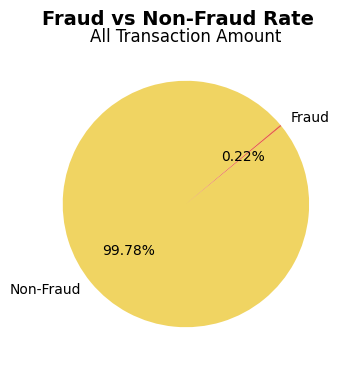

In [47]:
#Calculating fraud rate of RevoBank.

total_fraud_amt = card_eda['amt_fraud_trx_L6M'].sum()
total_nonfraud_amt = card_eda['amt_nonfraud_trx_L6M'].sum()

total_all_amt = total_fraud_amt + total_nonfraud_amt
fraud_rate = total_fraud_amt/total_all_amt * 100
print(f"Fraud rate: {fraud_rate:.2f}%")

plt.figure(figsize=(4,4))
plt.pie(
    [total_nonfraud_amt, total_fraud_amt],
    labels=["Non-Fraud", "Fraud"],
    autopct="%.2f%%",
    colors=["#f0d462", "#e76a43"],
    startangle=40,
    wedgeprops={'linewidth': 0}
)

plt.suptitle("Fraud vs Non-Fraud Rate ", fontsize=14, fontweight='bold')
plt.title("All Transaction Amount")
plt.show()


*RevoBank's overall transaction fraud rate of 0.22% is considered safe because it is still below the general threshold of 0.5 - 1% that is typically used as the high-risk limit in the payment industry.*

   card_brand  fraud_rate
0        Amex    0.209431
1         JCB    0.246637
2  Mastercard    0.236441
3        Visa    0.203390




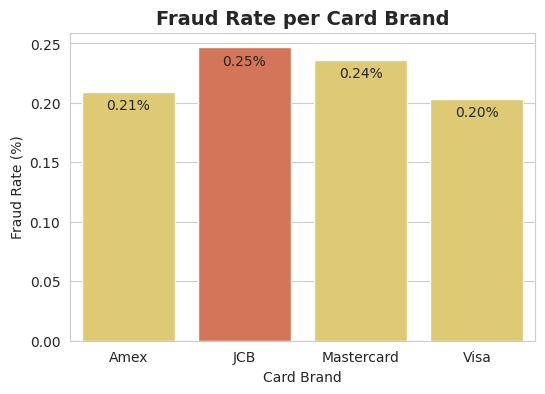

In [48]:
#Additional Checking Fraud Rate per Card Brand
fraud_rate_per_brand = (
    card_eda.groupby("card_brand", group_keys=False)[['amt_fraud_trx_L6M', 'amt_nonfraud_trx_L6M']]
    .apply(lambda x: x['amt_fraud_trx_L6M'].sum() /
                    (x['amt_fraud_trx_L6M'].sum() + x['amt_nonfraud_trx_L6M'].sum()) * 100)
    .reset_index(name="fraud_rate")
)
print(fraud_rate_per_brand)
print('\n')

#Visualization
colors = [ "#f0d462", "#e76a43", "#f0d462", "#f0d462"]
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(6,4))
bars = sns.barplot(
    data=fraud_rate_per_brand,
    x="card_brand",
    y="fraud_rate",
    hue="card_brand",
    palette=colors,
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", label_type="edge", padding=-15)

ax.set_ylabel("Fraud Rate (%)")
ax.set_xlabel("Card Brand")
ax.set_title("Fraud Rate per Card Brand", fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.show()


*   *The highest fraud rate was found in JCB (0.2466% / ±0.25%), indicating that transactions with JCB are relatively more vulnerable than other brands -> It is necessary to investigate whether this is caused by certain transaction patterns, specific merchants, or verification weaknesses.*
*   *Visa's fraud rate is at 0.2034%, which is the lowest among other brands -> This could indicate that Visa's security system or user profile at RevoBank is more secure.*



### Card Brand Transaction Behaviour

In [49]:
#Is there any difference in transaction behavior per card brand?
avg_per_brand = (
    card_eda.groupby('card_brand')[['count_nonfraud_trx_L6M', 'amt_nonfraud_trx_L6M']]
    .mean()
    .round(2)
    .sort_values(by='count_nonfraud_trx_L6M', ascending=False)
)

avg_per_brand


count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M
card_brand                                              
Mastercard                  121.93           80595841.17
Visa                        116.06           82617651.61
Amex                        112.94           98852996.45
JCB                          84.40           75026117.07

*JCB has the lowest transaction frequency and value among the four card brands, which could be an area for growth or marketing focus if it wants to increase usage penetration.*

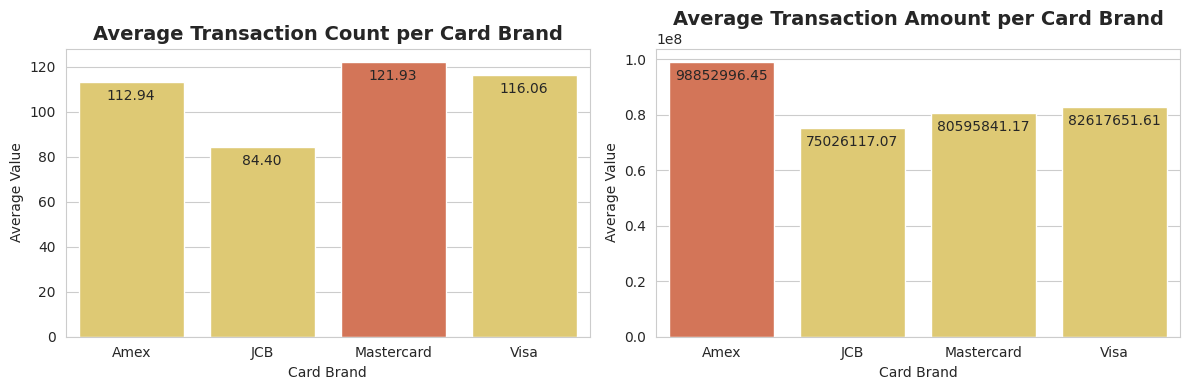

In [50]:
avg_count_perbrand = (
    card_eda.groupby('card_brand')['count_nonfraud_trx_L6M']
    .mean()
    .round(2)
    .reset_index()
)

avg_amt_perbrand = (
    card_eda.groupby('card_brand')['amt_nonfraud_trx_L6M']
    .mean()
    .round(2)
    .reset_index()
)

#Visualization
custom_colors_count = ['#f0d462', '#f0d462', '#e76a43', '#f0d462']
custom_colors_amount = ['#e76a43', '#f0d462', '#f0d462', '#f0d462']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#Average Count per Brand Chart
sns.barplot(
    data=avg_count_perbrand,
    x='card_brand',
    y='count_nonfraud_trx_L6M',
    hue='card_brand',
    palette=custom_colors_count,
    ax=axes[0]
)
axes[0].set_title("Average Transaction Count per Card Brand", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Average Value")
axes[0].set_xlabel("Card Brand")
for container in axes[0].containers:
    axes[0].bar_label(container, fmt="%.2f", padding=-15)

#Average Amount per Brand Chart
sns.barplot(
    data=avg_amt_perbrand,
    x='card_brand',
    y='amt_nonfraud_trx_L6M',
    hue='card_brand',
    palette=custom_colors_amount,
    ax=axes[1]
)
axes[1].set_title("Average Transaction Amount per Card Brand", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Average Value")
axes[1].set_xlabel("Card Brand")
for container in axes[1].containers:
    axes[1].bar_label(container, fmt="%.2f", padding=-15)

plt.tight_layout()
plt.show()


*  *Mastercard users tend to make transactions more frequently than users of other card brands.*
*  *Although the frequency of transactions is not as high as Mastercard. This indicates that American Express users tend to make transactions with much larger amounts per transaction.*

### Retired vs Non-Retired DTI ratio

               count      mean       std  min     25%     50%      75%     max
retired_flag                                                                  
False         1715.0  0.295748  0.153898  0.0  0.2109  0.2972  0.39135  0.9483
True           285.0  0.067155  0.070972  0.0  0.0086  0.0440  0.10380  0.4241




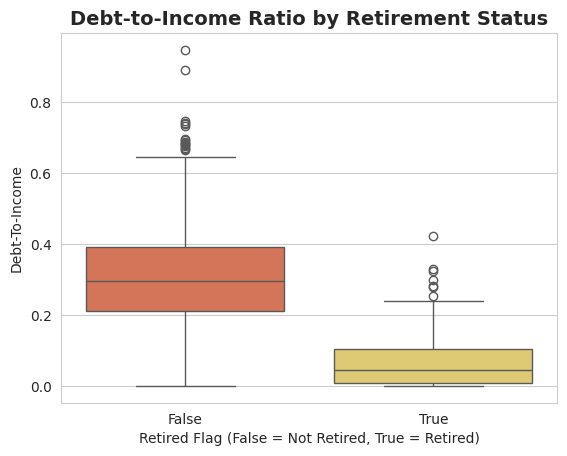

In [51]:
#Comparing the debt-to-income ratios of retired vs non-retired users.

dti_compare = user_eda.groupby('retired_flag')['dti'].describe()

print(dti_compare)
print('\n')

#Visualization
custom_colors = {False: '#e76a43', True: '#f0d462'}
sns.boxplot(
    x='retired_flag',
    y='dti',
    data=user_eda,
    hue='retired_flag',
    legend=False,
    palette=custom_colors
)
plt.title('Debt-to-Income Ratio by Retirement Status', fontsize=14, fontweight='bold')
plt.xlabel('Retired Flag (False = Not Retired, True = Retired)')
plt.ylabel('Debt-To-Income')
plt.show()

* *In False (not yet retired), there are several DTI > 0.6, even approaching 0.9 → indicating `non-retired customers may have higher credit risk` and could be more vulnerable to repayment difficulties, especially if income changes.*
* *In True (retired), the highest outlier is around 0.42 → relatively much lower than the not yet retired group, making them lower risk in terms of debt load.*



### Average DTI per Credit Score Category

  credit_score_category   avg_dti   avg_count    avg_amount  user_count
0                  Poor  0.301835  305.480519  2.290265e+08          77
1                  Fair  0.318220  287.595092  2.019485e+08         326
2                  Good  0.250305  337.049288  2.419351e+08         913
3             Very Good  0.245724  366.563043  2.478267e+08         460
4           Exceptional  0.242912  350.302469  2.315197e+08         162


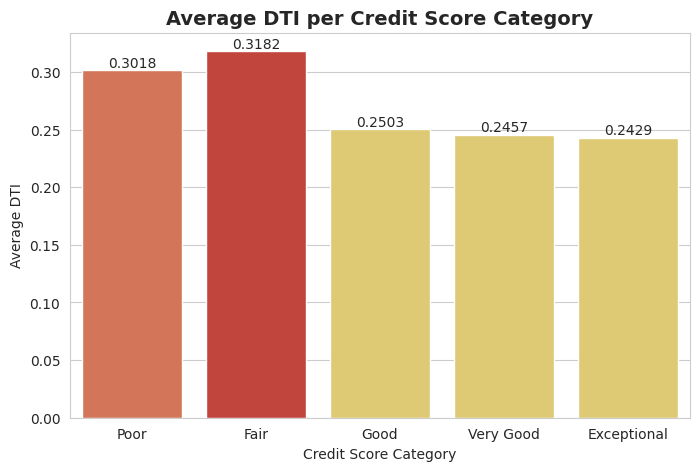

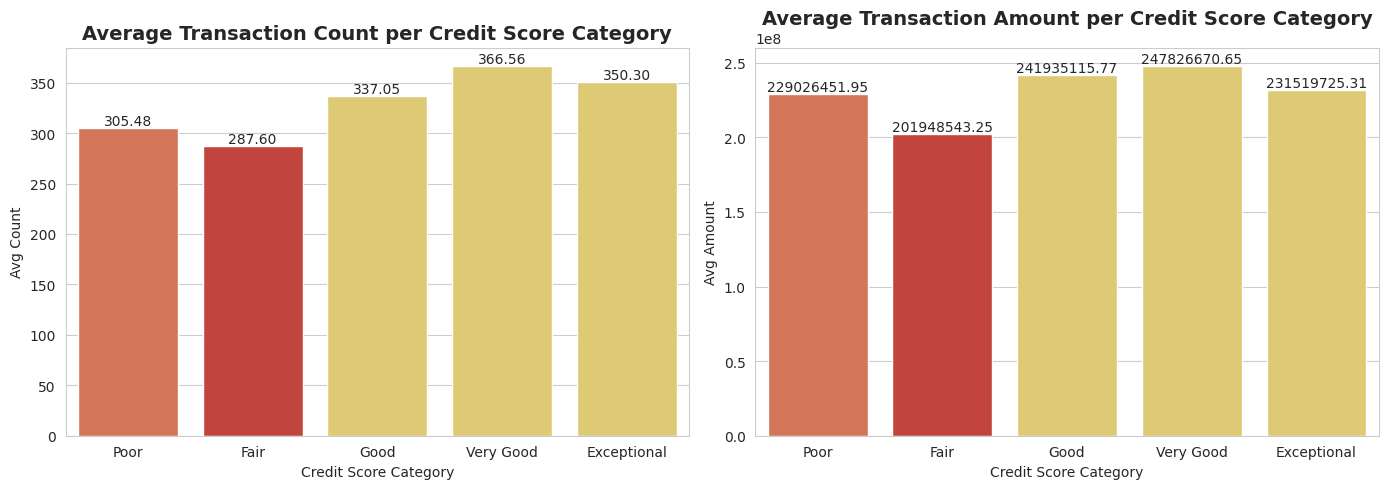

In [52]:
#Creating Credit Score Category based on FICO
bins = [0, 579, 669, 739, 799, float('inf')]
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

final_data['credit_score_category'] = pd.cut(
    final_data['credit_score'],
    bins=bins,
    labels=labels
)

#Average DTI per Category
avg_stats = (
    final_data.groupby('credit_score_category', observed=True)
    .agg(
        avg_dti=('dti', 'mean'),
        avg_count=('count_nonfraud_trx_L6M', 'mean'),
        avg_amount=('amt_nonfraud_trx_L6M', 'mean'),
        user_count=('user_id', 'nunique')
    )
    .reset_index()
)
print(avg_stats)


# 5. Visualization: Average DTI per Credit Score Category

score_colors = {
    'Poor': '#e76a43',
    'Fair': '#d73027',
    'Good': '#f0d462',
    'Very Good': '#f0d462',
    'Exceptional': '#f0d462'
}

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    data=avg_stats,
    x='credit_score_category',
    y='avg_dti',
    hue='credit_score_category',
    palette=score_colors,
    legend=False
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f')
ax.set_title('Average DTI per Credit Score Category', fontsize=14, fontweight='bold')
ax.set_xlabel('Credit Score Category')
ax.set_ylabel('Average DTI')
plt.show()

print('\n')

# 6. Visualization: Transaction Behaviour per Credit Score Category
score_colors1 = {
    'Poor': '#e76a43',
    'Fair': '#d73027',
    'Good': '#f0d462',
    'Very Good': '#f0d462',
    'Exceptional': '#f0d462'
}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count transactions
sns.barplot(
    data=avg_stats,
    x='credit_score_category',
    y='avg_count',
    hue='credit_score_category',
    palette=score_colors1,
    legend=False,
    ax=axes[0]
)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')
axes[0].set_title('Average Transaction Count per Credit Score Category', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Credit Score Category')
axes[0].set_ylabel('Avg Count')

# Amount transactions
sns.barplot(
    data=avg_stats,
    x='credit_score_category',
    y='avg_amount',
    hue='credit_score_category',
    palette=score_colors1,
    legend=False,
    ax=axes[1]
)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f')
axes[1].set_title('Average Transaction Amount per Credit Score Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Credit Score Category')
axes[1].set_ylabel('Avg Amount')

plt.tight_layout()
plt.show()


*   *`Poor` and `Fair` have higher DTI (0.30–0.32), meaning that people with low credit scores have a higher debt-to-income ratio.*
*   *`Good`, `Very Good`, and `Exceptional` have lower DTI (~0.25–0.24), indicating a healthier debt-to-income ratio.*

When looking at the relationship with transactions, there is no indication that a higher DTI results in higher transactions.
*   *`Fair` has the highest DTI (0.318) but the lowest number of transactions (287.6) and transaction value (~201.9 million).*
*  *`Good`, `Very Good`, and `Exceptional` have low DTIs but the highest number and value of transactions.*

Segments with high DTI + low transactions (such as Fair) are low value and high risk segments, which are generally not ideal for aggressive additional credit.




### Relation of User Age and Credit Limit

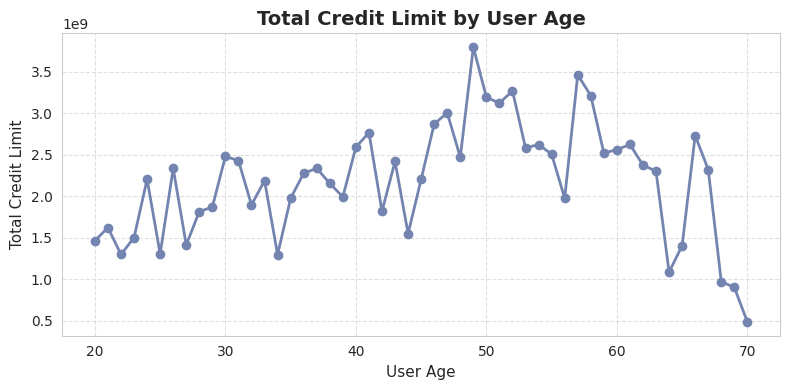

In [53]:
#Is there a relationship between user_age and credit_limit?

data_trimmed = final_data[(final_data['user_age'] >= 20) & (final_data['user_age'] <= 70)]

age_credit = data_trimmed.groupby('user_age')['credit_limit'].sum().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(age_credit['user_age'], age_credit['credit_limit'], marker='o', color='#7484b0', linewidth=2)
plt.title('Total Credit Limit by User Age', fontsize=14, fontweight='bold')
plt.xlabel('User Age', fontsize=11)
plt.ylabel('Total Credit Limit', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


*Total credit limit tends to increase from the early 20s, peaks around 45–55 years, then declines sharply after ~60 -> This pattern likely reflects income stability, career maturity, and retirement transition.*

### Transaction Behaviour based on Gender

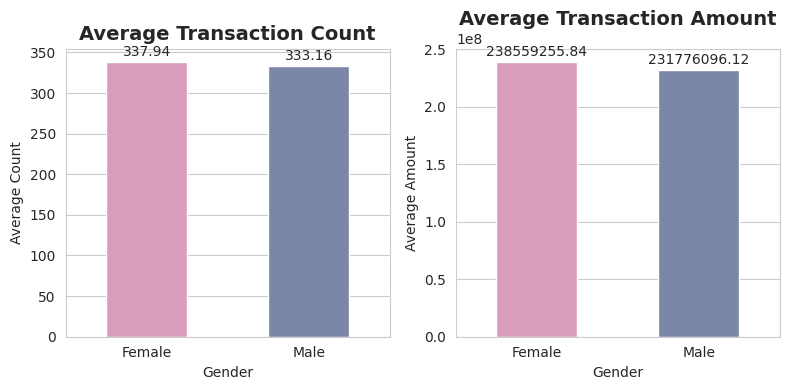

In [54]:
#Is there any transactions behaviour based on gender?
trx_per_gender = (
    final_data.groupby('gender')[['count_nonfraud_trx_L6M', 'amt_nonfraud_trx_L6M']]
    .mean()
    .round(2)
    .reset_index()
)

trx_per_gender

print('\n')
gender_colors = {
    'Male': '#7484b0',
    'Female': '#e393bd'
}

#Visualization
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

#Average Count Transaction
sns.barplot(
    data=trx_per_gender,
    x='gender',
    y='count_nonfraud_trx_L6M',
    hue='gender',
    palette=gender_colors,
    legend=False,
    ax=axes[0],
    width=0.5
)
axes[0].set_title('Average Transaction Count', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Average Count')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f',padding= 2)

#Average Amount Transaction
sns.barplot(
    data=trx_per_gender,
    x='gender',
    y='amt_nonfraud_trx_L6M',
    hue='gender',
    palette=gender_colors,
    legend=False,
    ax=axes[1],
    width=0.5
)
axes[1].set_title('Average Transaction Amount' , fontsize=14, fontweight='bold')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Average Amount')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f', padding= 2)

plt.tight_layout()
plt.show()


*The frequency of transactions and amount transaction is almost the same between men and women. Although women spend more.*

### Dormant Cards Detecting

Since our card data does not indicate whether it is active or inactive, we detect it manually by looking at the last day of transaction and detecting whether there is a transaction or not.

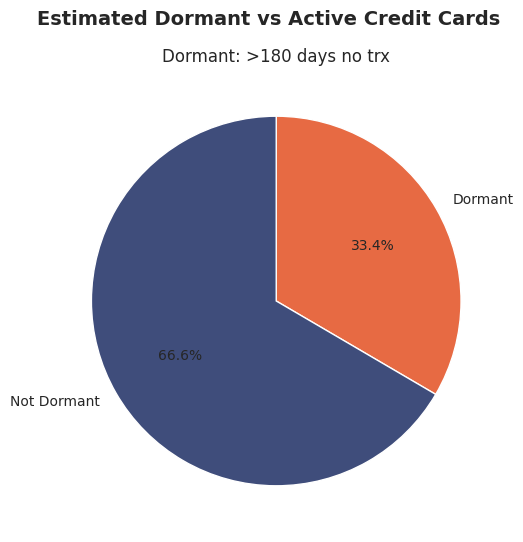

Total cards: 5528
Dormant cards: 1848
Active cards: 3680
Percentage dormant cards: 33.43%


In [55]:
# Dormant/Inactive cards detection (no transactions for more than 6 months (180 days))
dormant_cards = card_eda[
    (card_eda['days_since_last_trx'] > 180) &
    (
        (card_eda['count_nonfraud_trx_L6M'] == 0) &
        (card_eda['amt_nonfraud_trx_L6M'] == 0) &
        (card_eda['count_fraud_trx_L6M'] == 0) &
        (card_eda['amt_fraud_trx_L6M'] == 0)
    )
]

total_cards = len(card_eda)
total_dormant_cards = len(dormant_cards)
total_active_cards = total_cards - total_dormant_cards

#Visualization
labels = ['Dormant', 'Not Dormant']
sizes = [total_dormant_cards, total_active_cards]
colors = ['#e76a43','#3f4d7b']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, counterclock=False)
plt.suptitle('Estimated Dormant vs Active Credit Cards', fontsize=14, fontweight='bold')
plt.title('Dormant: >180 days no trx')
plt.show()

print(f"Total cards: {total_cards}")
print(f"Dormant cards: {total_dormant_cards}")
print(f"Active cards: {total_active_cards}")
print(f"Percentage dormant cards: {total_dormant_cards / total_cards:.2%}")



*   *Approximately 33.4% of credit cards are dormant (no transactions for >180 days), which means that one-third of cards are not generating revenue from transactions.*
*   *66.6% of cards are still actively used, so the potential for profit and engagement remains intact for the majority of users.*
*   *The relatively high percentage of dormant cards indicates an opportunity for reactivation campaigns or special promotions targeting inactive cardholders.*
*   *The high number of dormant cards may indicate a lack of relevance in the card's offers or benefits for some users.*




                      User Category  Number of Users Total User Presentation
0              All cards are active              877                   45.3%
1                 All cards dormant              743                   38.3%
2  User with dormant & active cards              318                   16.4%
3                        Total User             1938                    100%




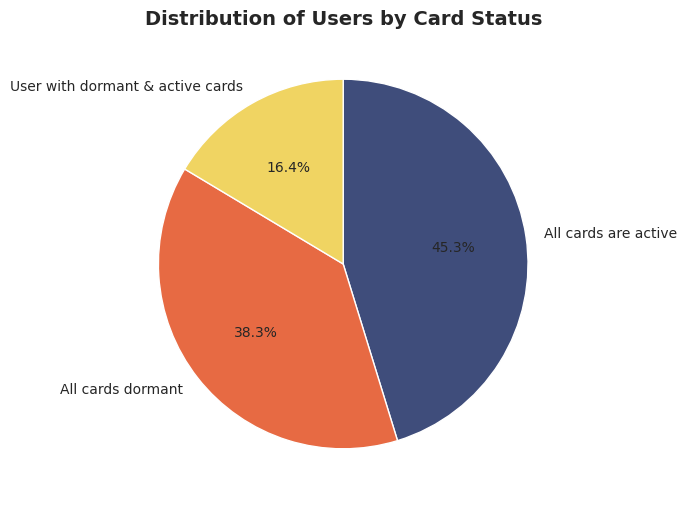

In [56]:
#Detecting user with dormant card, using data_merged (merged data without user grouping, for identify user with card detail )

data_merged['dormant_flag'] = (
    (data_merged['days_since_last_trx'] > 180) &
    (data_merged['count_nonfraud_trx_L6M'] == 0) &
    (data_merged['amt_nonfraud_trx_L6M'] == 0) &
    (data_merged['count_fraud_trx_L6M'] == 0) &
    (data_merged['amt_fraud_trx_L6M'] == 0)
)

total_users = data_merged['user_id'].nunique()
users_with_dormant = set(data_merged.loc[data_merged['dormant_flag'], 'user_id'])
users_with_mix_status = [
    user for user in users_with_dormant
    if data_merged.loc[data_merged['user_id'] == user, 'dormant_flag'].sum() <
       len(data_merged.loc[data_merged['user_id'] == user])
]

all_active = total_users - len(users_with_dormant)
all_dormant = len(users_with_dormant) - len(users_with_mix_status)
mix_status = len(users_with_mix_status)

card_summary = pd.DataFrame({
    'User Category': [
        'All cards are active',
        'All cards dormant',
        'User with dormant & active cards',
        'Total User'
    ],
    'Number of Users': [
        all_active,
        all_dormant,
        mix_status,
        total_users
    ],
    'Total User Presentation': [
        f"{all_active/total_users:.1%}",
        f"{all_dormant/total_users:.1%}",
        f"{mix_status/total_users:.1%}",
        "100%"
    ]
})

print(card_summary)
print('\n')

#Visualization
labels = card_summary['User Category'][:3]
sizes = card_summary['Number of Users'][:3]
colors = ['#3f4d7b', '#e76a43', '#f0d462']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90, counterclock=False, colors=colors)
plt.title('Distribution of Users by Card Status' , fontsize=14, fontweight='bold')
plt.show()

*   *38% of customers have cards but are no longer active → this is prone to closure or reduced bank profits.*
*   *16% of customers have active cards and dormant cards → these dormant cards are likely to be backup cards or specific promotions. They can be reactivated through special promotions.*



# Milestone 3: Customer Segmentation

KMeans clustering is chosen because it enables segmentation using not only transactional behavior but also customer attributes such as credit limit, debt-to-income ratio, credit score, and age. By combining transactional and demographic/financial profiles, the segmentation becomes more targeted and actionable, aligning with RevoBank’s objective to identify customer groups with strong capacity and potential to increase spending.

In [57]:
#Import KMeans Clustering Libs
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [58]:
#Make a copy of final data for segmentation
segmentation_df = final_data.copy()
segmentation_df

user_id  gender  yearly_income  total_debt  credit_score  user_age  \
0        825  Female     93663000.0  38138095.0           787        52   
1       1746  Female    121212000.0  57186095.0           701        52   
2       1718  Female     52535000.0     58666.0           698        80   
3        708  Female    392132000.0  60467238.0           722        62   
4       1164    Male    172099000.0  54946285.0           675        42   
...      ...     ...            ...         ...           ...       ...   
1933     986    Male     75328000.0  26250666.0           703        31   
1934    1944  Female     77474000.0  31224571.0           740        61   
1935     185  Female     48548000.0  21238666.0           779        46   
1936    1007    Male     85752000.0   8141142.0           618        65   
1937    1110  Female    103411000.0  54171238.0           673        20   

         dti  retired_flag  credit_limit  count_nonfraud_trx_L6M  \
0     0.4072         False   164867000.0                     599   
1     0.4718         False   102033000.0                     189   
2     0.0011          True   209210000.0                    1322   
3     0.1542         False   558975000.0                     378   
4     0.3193         False    54758000.0                     496   
...      ...           ...           ...                     ...   
1933  0.3485         False    95255000.0                     630   
1934  0.4030         False    79140000.0                     521   
1935  0.4375         False    45524000.0                     644   
1936  0.0949          True    14435000.0                       0   
1937  0.5238         False    66642000.0                       0   

      amt_nonfraud_trx_L6M  count_fraud_trx_L6M  amt_fraud_trx_L6M  \
0              755489800.0                    1         -7421400.0   
1              388726600.0                    0                0.0   
2              705750600.0                    0                0.0   
3              897483900.0                    0                0.0   
4              763527700.0                    0                0.0   
...                    ...                  ...                ...   
1933           190875200.0                    0                0.0   
1934           337055200.0                    2         -3552400.0   
1935           293676000.0                    0                0.0   
1936                   0.0                    0                0.0   
1937                   0.0                    0                0.0   

      days_since_last_trx credit_score_category  
0                      10             Very Good  
1                      24                  Good  
2                       4                  Good  
3                       4                  Good  
4                      21                  Good  
...                   ...                   ...  
1933                    2                  Good  
1934                    4             Very Good  
1935                    9             Very Good  
1936                  604                  Fair  
1937                  604                  Good  

[1938 rows x 15 columns]

## Data Preprocessing

### Features Selection

*To identify meaningful customer segments, I selected features that directly capture financial capacity, spending behavior, credit risk, and demographic profile. These features provide a comprehensive view of customers, enabling us to distinguish between high-value, low-risk, and dormant segments:*

1.   `credit_limit`: Represents the maximum spending capacity assigned by the bank, making it a key indicator of how much a customer can spend if properly encouraged.
2.   `amt_nonfraud_trx_L6M`: Captures the actual monetary value of a customer’s recent spending, providing direct insight into current usage levels relative to their capacity.
3.   `count_nonfraud_trx_L6M`: Reflects customer engagement and activity frequency, distinguishing between highly active users and those with low transaction intensity.
4.   `days_since_last_trx`: Measures recency of activity, identifying dormant customers who may need reactivation versus actively engaged ones.
5.   `dti`: Indicates financial health by comparing total debt to income, where lower ratios suggest customers have more room to increase spending safely.
6.   `credit_score`: Serves as a widely recognized proxy for creditworthiness, allowing segmentation of customers by their risk level and suitability for upsell campaigns.
7.   `user_age`: Represents demographic and life stage, helping tailor product offerings as spending behavior often shifts between younger, mid-career, and senior customers.

In [59]:
#Choosing features and making new dataframe
features = segmentation_df[['credit_limit', 'amt_nonfraud_trx_L6M', 'count_nonfraud_trx_L6M',
                                         'days_since_last_trx', 'dti', 'credit_score', 'user_age']]
features

credit_limit  amt_nonfraud_trx_L6M  count_nonfraud_trx_L6M  \
0      164867000.0           755489800.0                     599   
1      102033000.0           388726600.0                     189   
2      209210000.0           705750600.0                    1322   
3      558975000.0           897483900.0                     378   
4       54758000.0           763527700.0                     496   
...            ...                   ...                     ...   
1933    95255000.0           190875200.0                     630   
1934    79140000.0           337055200.0                     521   
1935    45524000.0           293676000.0                     644   
1936    14435000.0                   0.0                       0   
1937    66642000.0                   0.0                       0   

      days_since_last_trx     dti  credit_score  user_age  
0                      10  0.4072           787        52  
1                      24  0.4718           701        52  
2                       4  0.0011           698        80  
3                       4  0.1542           722        62  
4                      21  0.3193           675        42  
...                   ...     ...           ...       ...  
1933                    2  0.3485           703        31  
1934                    4  0.4030           740        61  
1935                    9  0.4375           779        46  
1936                  604  0.0949           618        65  
1937                  604  0.5238           673        20  

[1938 rows x 7 columns]

In [60]:
#Checking the data type of all features, ensuring they are in numeric data type.
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938 entries, 0 to 1937
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   credit_limit            1938 non-null   float64
 1   amt_nonfraud_trx_L6M    1938 non-null   float64
 2   count_nonfraud_trx_L6M  1938 non-null   int64  
 3   days_since_last_trx     1938 non-null   int64  
 4   dti                     1938 non-null   float64
 5   credit_score            1938 non-null   int64  
 6   user_age                1938 non-null   int32  
dtypes: float64(3), int32(1), int64(3)
memory usage: 98.5 KB


*All features used already in numerical data type*

In [61]:
#Checking negative value of all features, because it would be anomaly
features[features < 0].count()

credit_limit              0
amt_nonfraud_trx_L6M      0
count_nonfraud_trx_L6M    0
days_since_last_trx       0
dti                       0
credit_score              0
user_age                  0
dtype: int64

*Yey! There is no minus data*

### Features Distribution Check

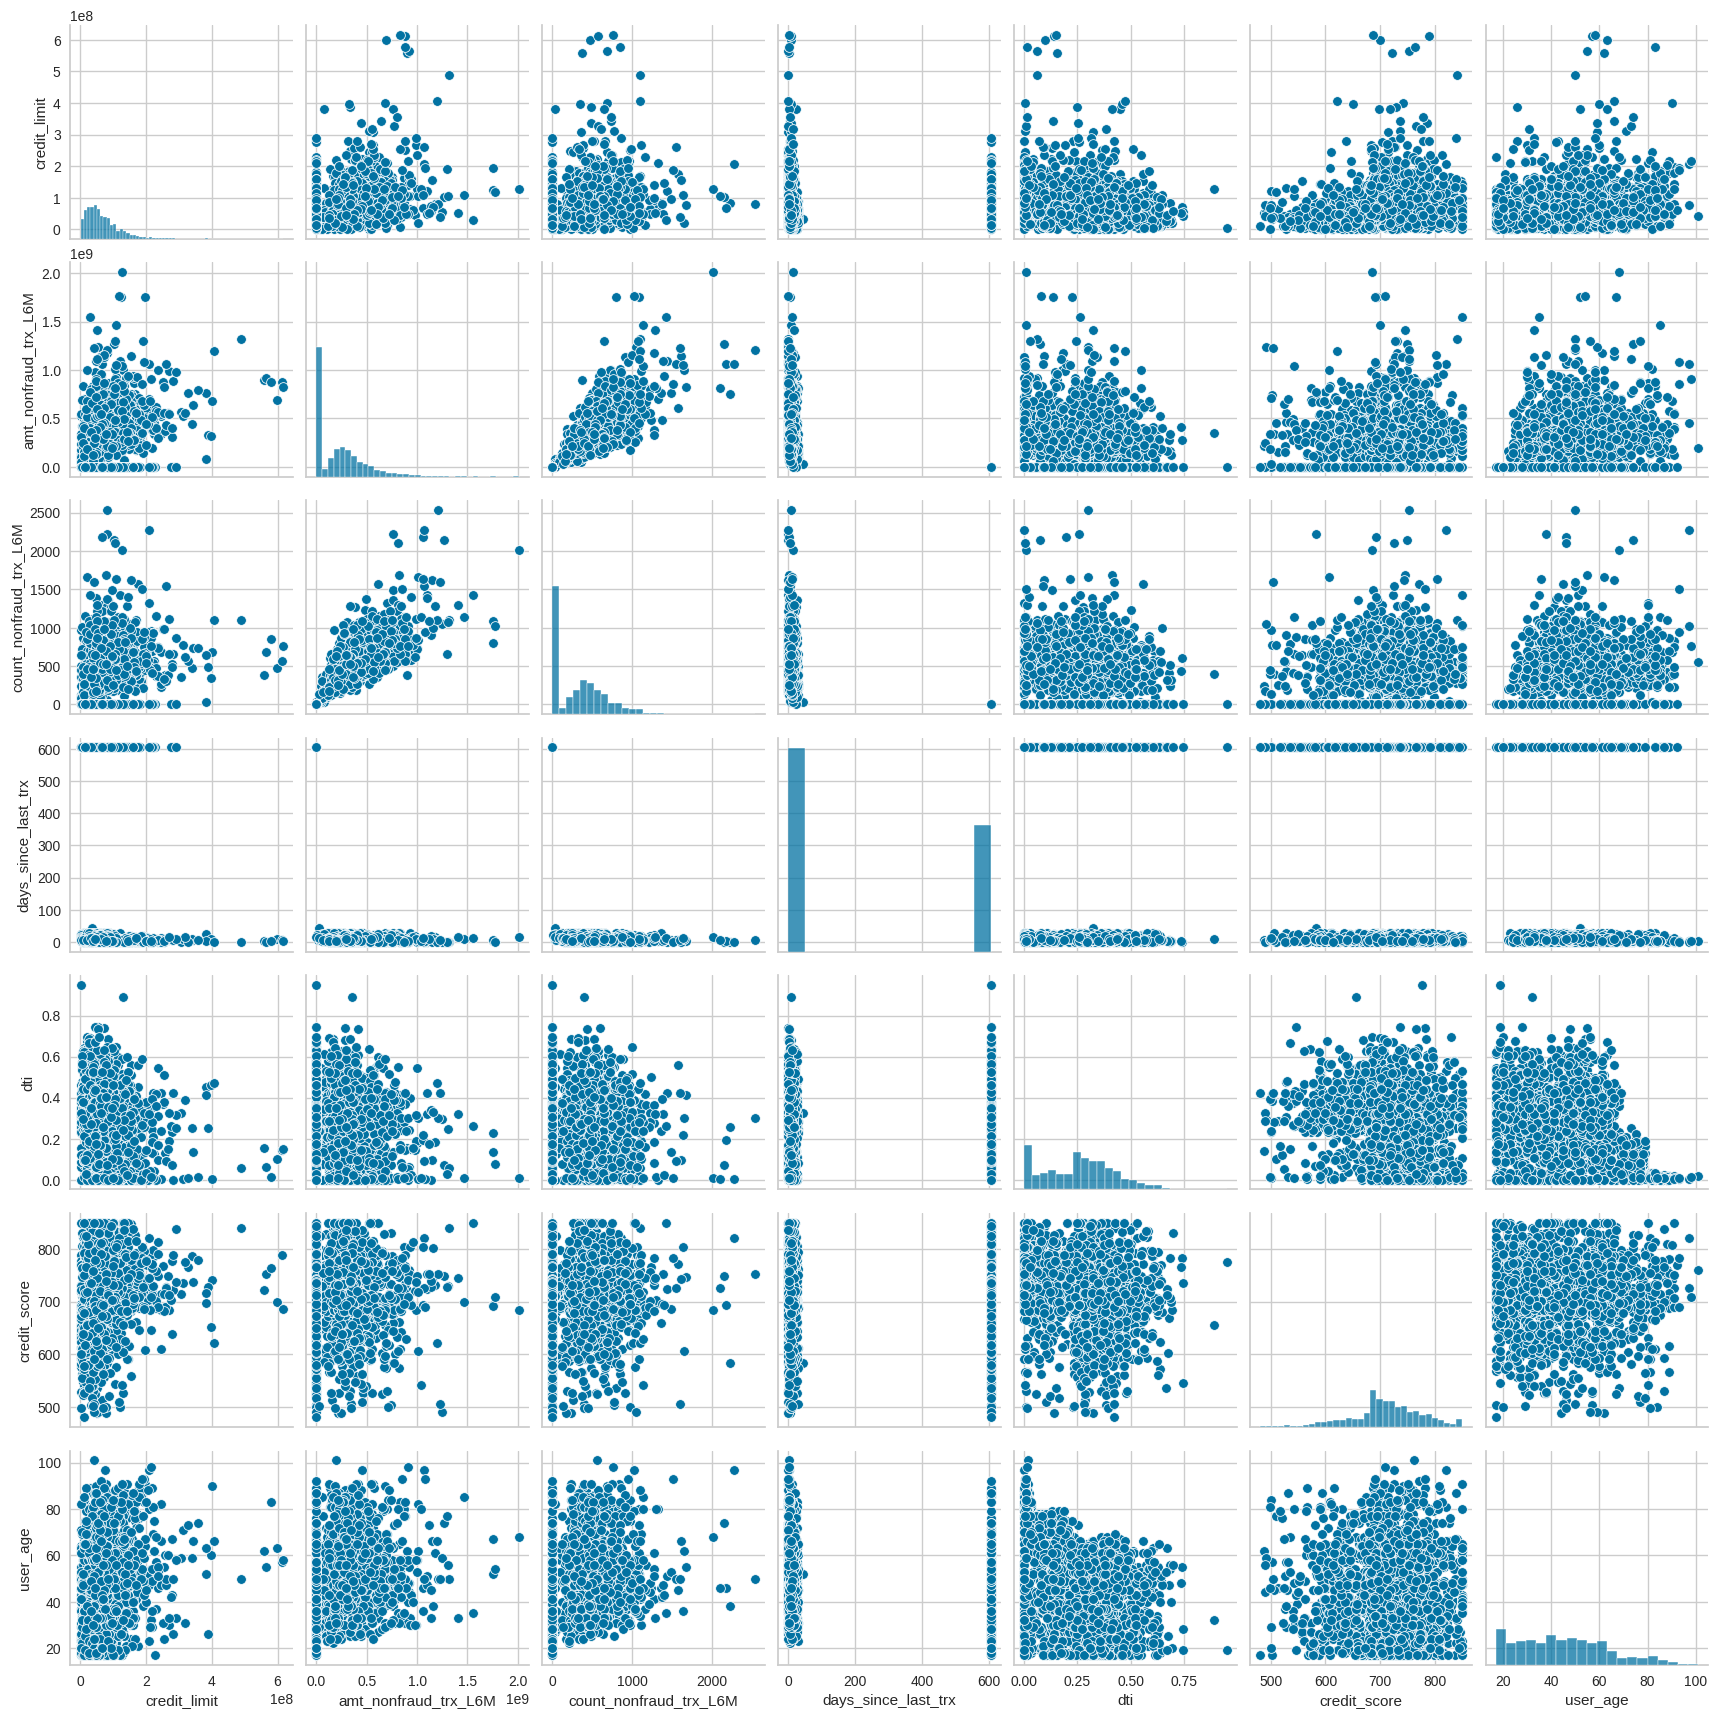

In [62]:
#Using pairplot for checking overall distribution & relation
sns.pairplot(features)

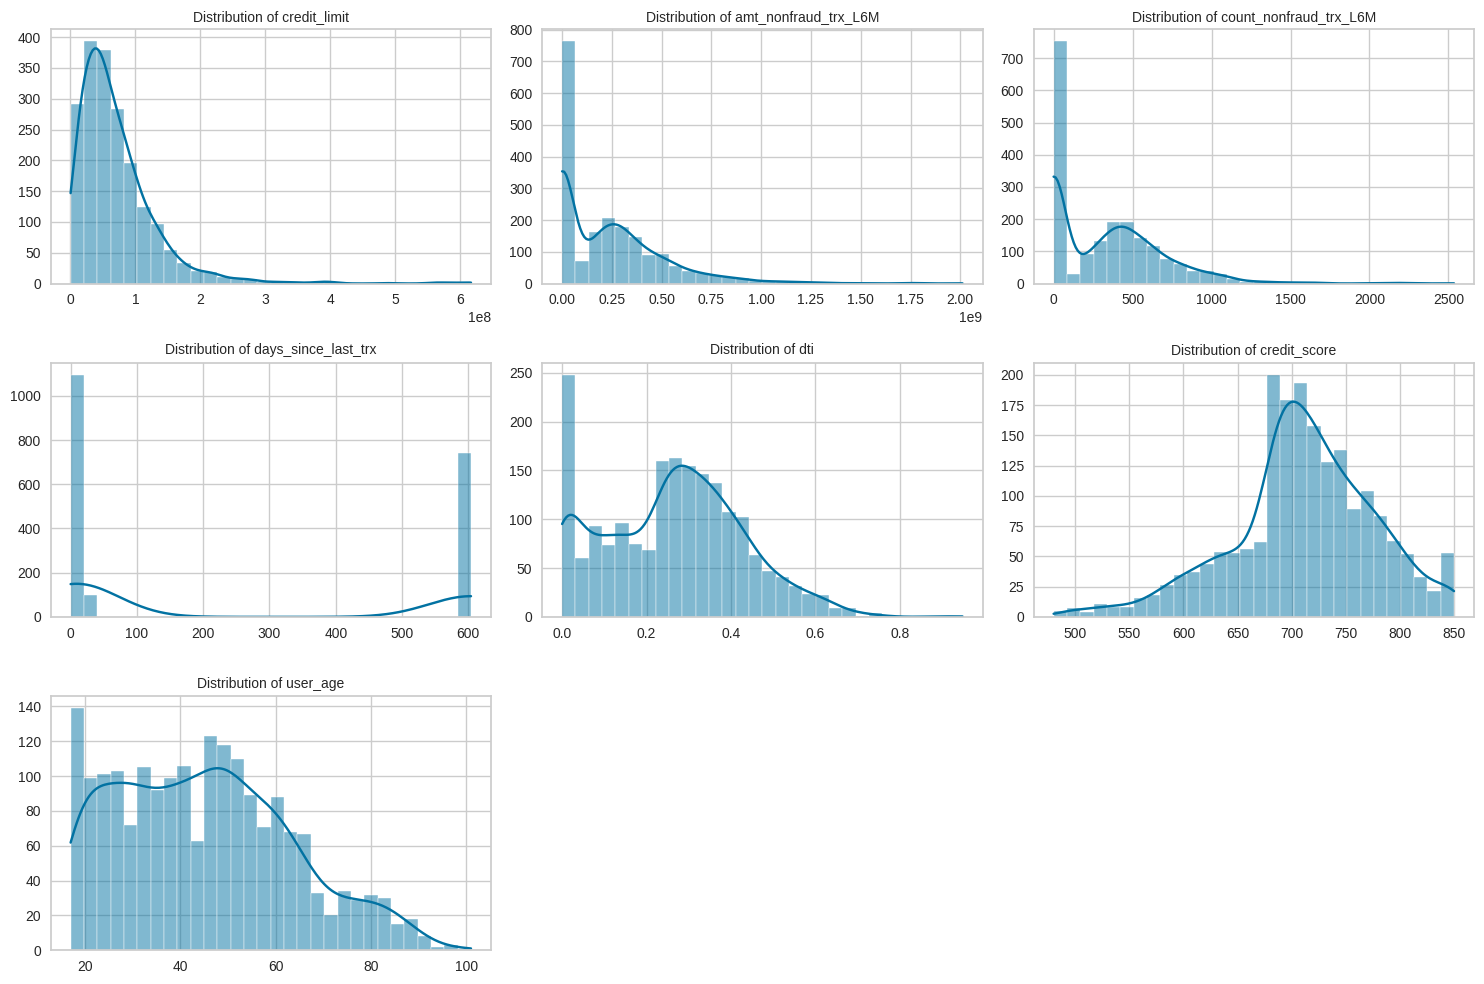

In [63]:
#Detailed checking each feature distribution
cols = ['credit_limit', 'amt_nonfraud_trx_L6M', 'count_nonfraud_trx_L6M',
        'days_since_last_trx', 'dti', 'credit_score', 'user_age']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(features[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()

*Most of the features in the dataset exhibit noticeable skewness. Features such as `credit_limit`, `amt_nonfraud_trx_L6M`, and `count_nonfraud_trx_L6M` are highly right-skewed, indicating that most customers have relatively small values while a few have extremely large ones. `days_since_last_trx` shows a U-shaped distribution, with many customers either very recent or very long since their last transaction. `dti` is moderately right-skewed, while `credit_score` is slightly left-skewed, clustering around higher values. In contrast, `user_age` appears closer to a uniform distribution but with a slight left skew.*

> ->> Therefore, I applied the PowerTransformer from scikit-learn, which helps stabilize variance, reduce skewness, and bring the features onto a comparable scale. This makes the data both closer to a normal distribution and more balanced across different ranges, making it more suitable for KMeans clustering.



### Features Scaling

In [64]:
ptr = PowerTransformer()

df_scaled = pd.DataFrame(ptr.fit_transform(features), columns = features.columns)
df_scaled.info()
df_scaled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938 entries, 0 to 1937
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   credit_limit            1938 non-null   float64
 1   amt_nonfraud_trx_L6M    1938 non-null   float64
 2   count_nonfraud_trx_L6M  1938 non-null   float64
 3   days_since_last_trx     1938 non-null   float64
 4   dti                     1938 non-null   float64
 5   credit_score            1938 non-null   float64
 6   user_age                1938 non-null   float64
dtypes: float64(7)
memory usage: 106.1 KB


credit_limit  amt_nonfraud_trx_L6M  count_nonfraud_trx_L6M  \
0         1.456879              0.955448                0.881043   
1         0.757670              0.822544                0.308673   
2         1.840380              0.941539                1.346862   
3         3.722446              0.990923                0.638515   
4        -0.020204              0.957616                0.779255   
...            ...                   ...                     ...   
1933      0.664964              0.687015                0.908841   
1934      0.423695              0.794819                0.805458   
1935     -0.226184              0.768302                0.921026   
1936     -1.293970             -1.262027               -1.235870   
1937      0.210837             -1.262027               -1.235870   

      days_since_last_trx       dti  credit_score  user_age  
0               -0.524406  0.886401      1.196524  0.489682  
1               -0.127716  1.241357     -0.211594  0.489682  
2               -0.930427 -1.653012     -0.256540  1.675874  
3               -0.930427 -0.623853      0.110803  0.951039  
4               -0.187802  0.384792     -0.591984 -0.030961  
...                   ...       ...           ...       ...  
1933            -1.207331  0.553928     -0.181477 -0.702231  
1934            -0.930427  0.862935      0.398071  0.907100  
1935            -0.572151  1.054266      1.055623  0.185682  
1936             1.189397 -1.010544     -1.354848  1.080254  
1937             1.189397  1.519312     -0.620394 -1.542489  

[1938 rows x 7 columns]

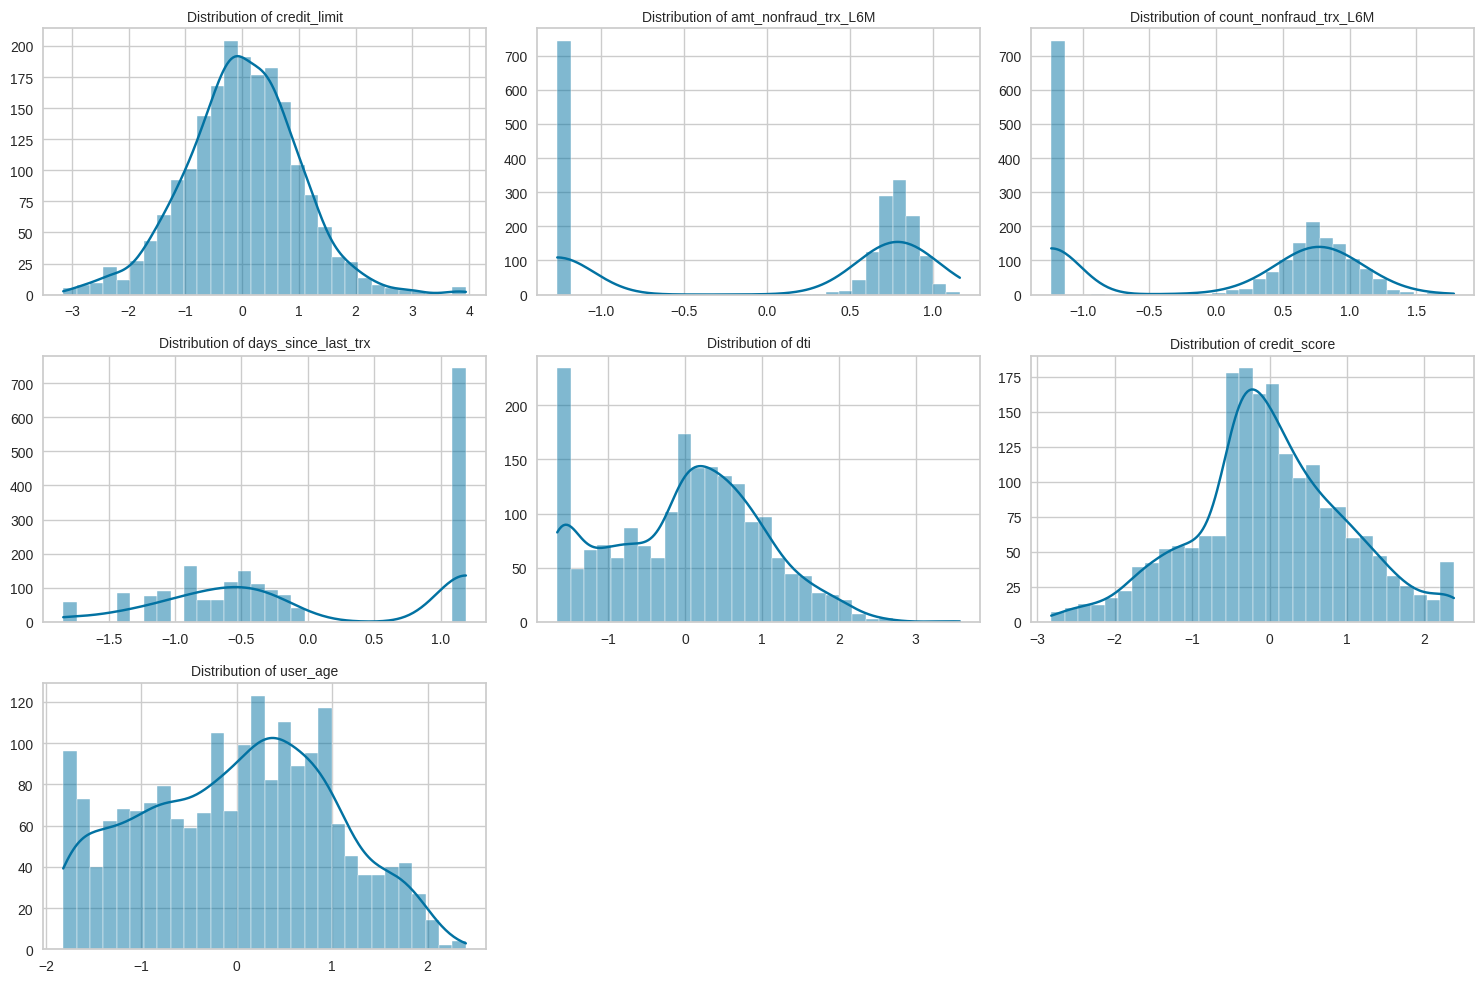

In [65]:
#Checking features distribution after scaled
cols = ['credit_limit', 'amt_nonfraud_trx_L6M', 'count_nonfraud_trx_L6M',
        'days_since_last_trx', 'dti', 'credit_score', 'user_age']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_scaled[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()

*The features are now more normally distributed and rescaled to a comparable range*

## Number of Cluster Determining

To determine the number of clusters (K), I used a combination of the Elbow Method and Silhouette Analysis.

### Elbow Method

The elbow method shows how much inertia is generated when we choose the number of clusters as “K”, so K is chosen when the decrease in inertia value on the plot is no longer steep.

[13565.999999999993,
 7204.862214809076,
 6066.759008578052,
 5428.570900397401,
 4902.029126229024,
 4546.419620564357,
 4275.129880303113,
 4062.9456897934347,
 3877.5618094202723,
 3708.294837461911,
 3446.8792914516075,
 3374.284132967453,
 3210.4625273016154]

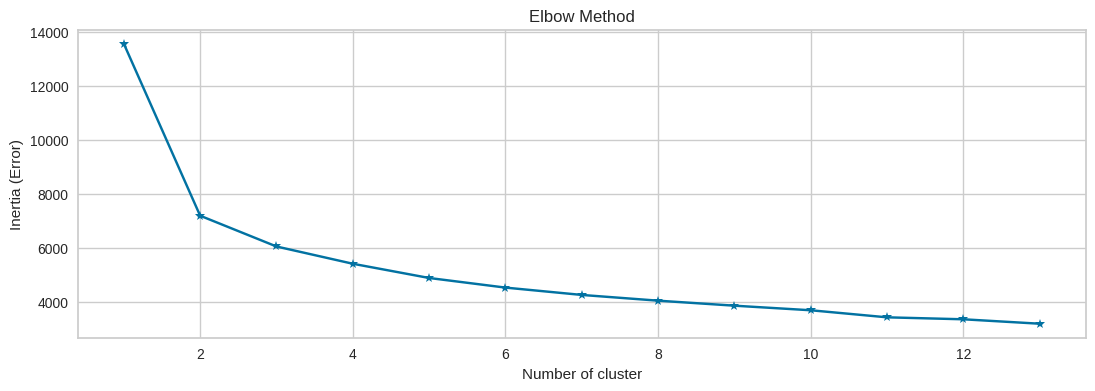

In [66]:
inertia = []

K_range = range(1,14)
for K in K_range:
  kmeanModel = KMeans(n_clusters=K, random_state=100, n_init='auto')
  kmeanModel.fit(df_scaled)
  inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(13,4))
plt.plot(K_range, inertia, 'b*-')

plt.xlabel('Number of cluster')
plt.ylabel('Inertia (Error)')
plt.title('Elbow Method')
inertia

*From the results of the elbow method plot, the decrease in inertia value begins to flatten out in the range of K = 3, K = 4, and K = 5 (we limit it to 5 so that the segments are not too large and complex).*

*However, we should reinforce this result by looking at the K value from the Silhouette Analysis.*

### Silhouette Method

In the Silhouette Method, each data point (row) is measured for its proximity to its cluster center compared to neighboring cluster centers. The score ranges from -1 to 1. The higher the score (closer to 1), the more accurately it is grouped.

Therefore, from the three K values considered from the previous Elbow Method results, the one with the highest Silhouette Score is selected as the final number of clusters to be used.

For k=2, the average silhouette score is 0.4368908593310189
For k=3, the average silhouette score is 0.3063759904965177
For k=4, the average silhouette score is 0.22940463138158737
For k=5, the average silhouette score is 0.20937280420143958
For k=6, the average silhouette score is 0.20542486230262488
For k=7, the average silhouette score is 0.19354827234784633
For k=8, the average silhouette score is 0.18515307627918426
For k=9, the average silhouette score is 0.17789463752147497
For k=10, the average silhouette score is 0.1787087242363003
For k=11, the average silhouette score is 0.18789388483395095
For k=12, the average silhouette score is 0.17592115011940704
For k=13, the average silhouette score is 0.18139293467996837


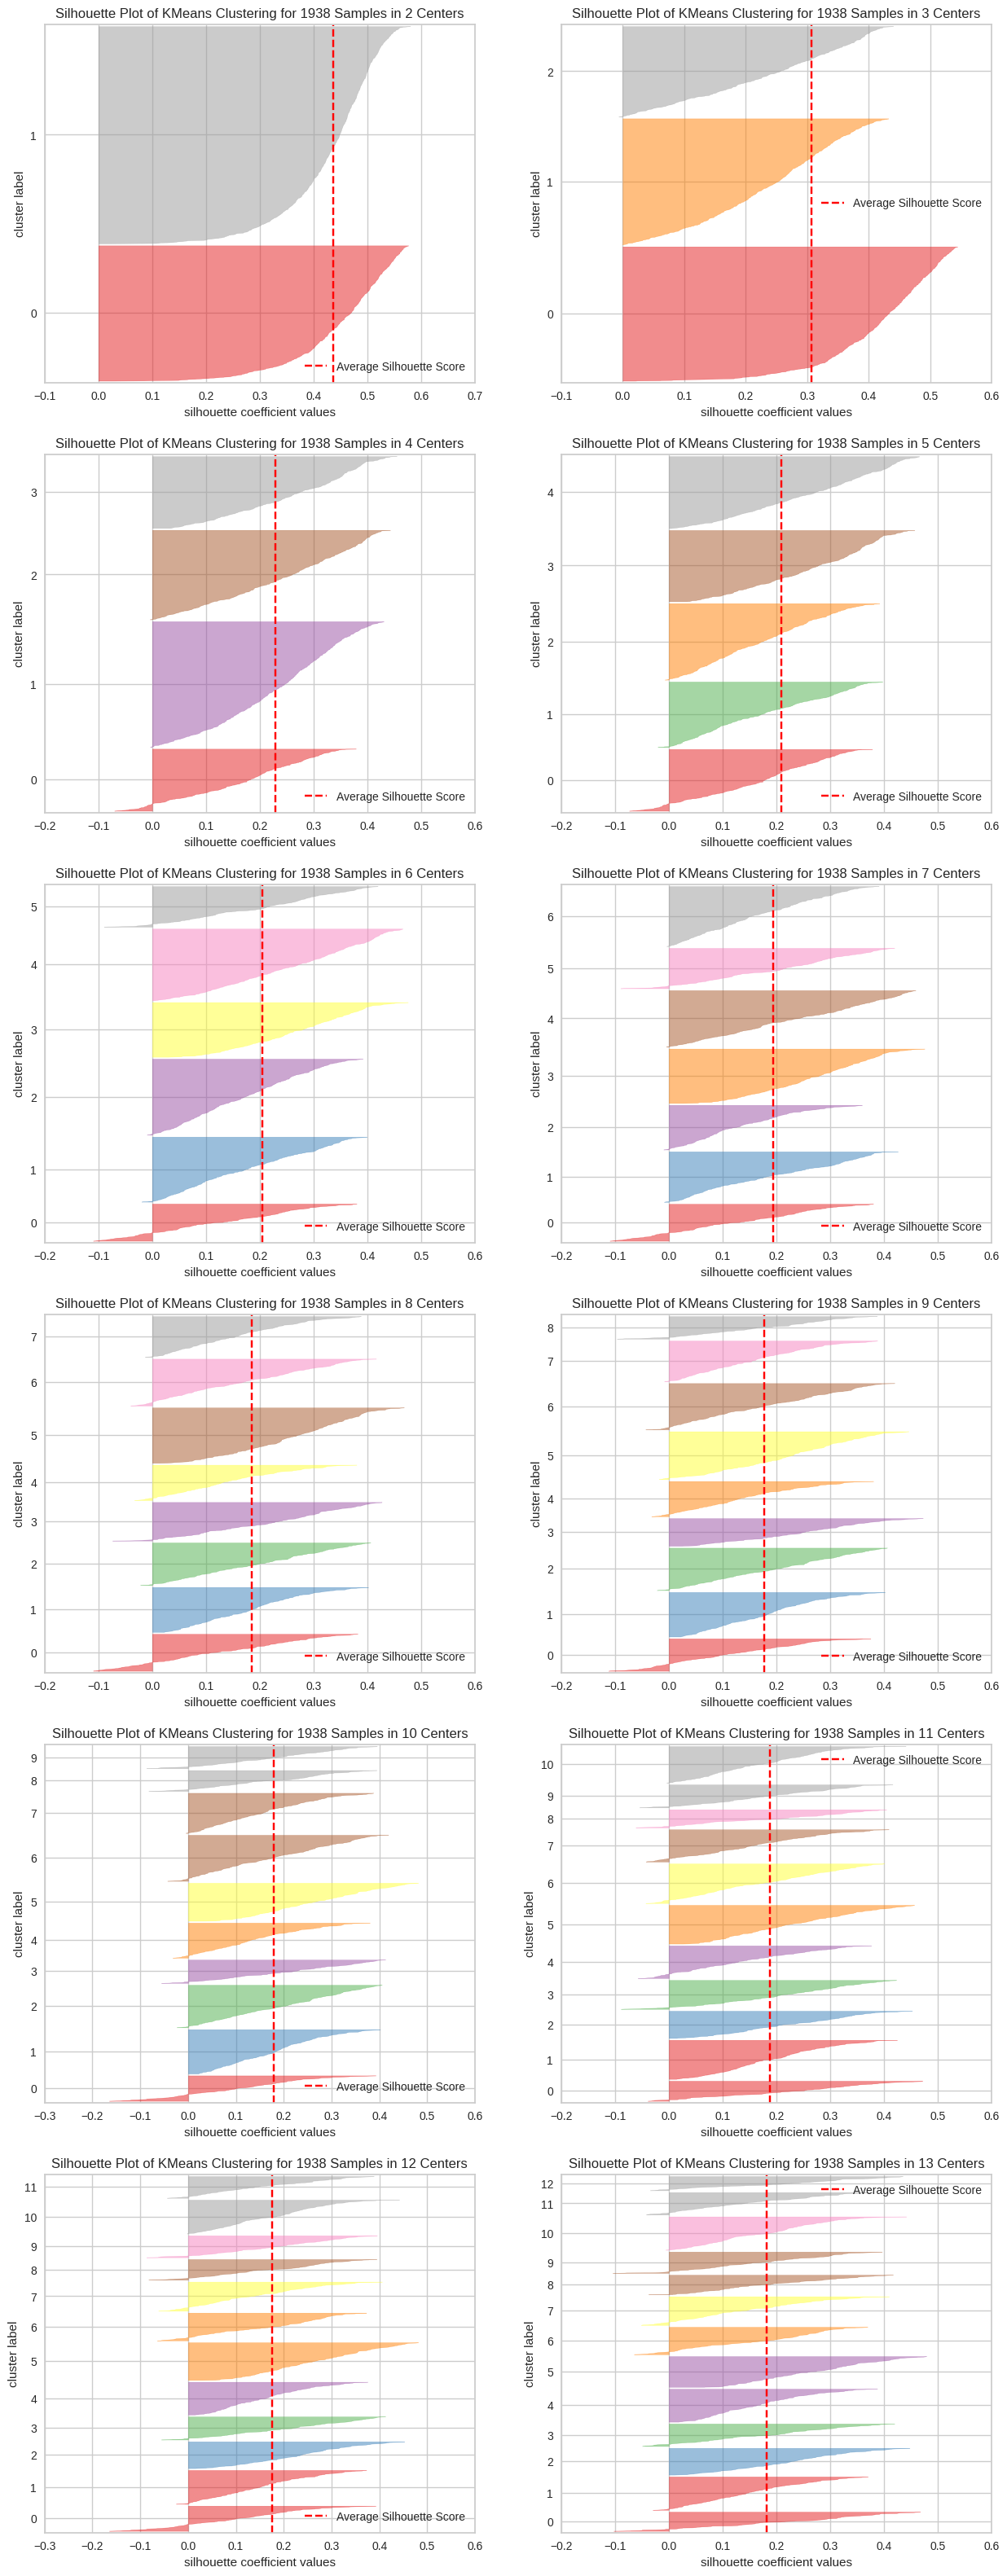

In [67]:
K_range = range(2, 14)

banyak_K = len(K_range)
n_baris = int(np.ceil(banyak_K/2))

fig, axes = plt.subplots(n_baris, 2, figsize=(15,40))

for index, K in enumerate(K_range):
  kmeanModel = KMeans(n_clusters=K, random_state=100, n_init='auto')

  sil = SilhouetteVisualizer(kmeanModel, is_fitted=False, ax=axes.flatten()[index])
  sil.fit(df_scaled)
  sil.finalize()
  print(f"For k={K}, the average silhouette score is {sil.silhouette_score_}")

*From K = 3, K = 4, and K = 5, the highest Silhouette Score value is obtained at K = 3 (0,30). Therefore, the number of clusters that we use in KMeans clustering is 3 (K=3).*

## KMeans Clustering

### Model Training and Labelling

In [68]:
#KMeans Initialization based on determined number of cluster
cluster_model = KMeans(n_clusters=3, random_state=100, n_init='auto')
cluster_model.fit(df_scaled)

KMeans(n_clusters=3, random_state=100)

In [69]:
# Check up cluster label
cluster_model.labels_

array([1, 1, 2, ..., 1, 0, 0], dtype=int32)

In [70]:
# Adding the cluster label produced by model to a new column in our original dataframe
df_result = features.copy()
df_result['cluster'] = cluster_model.labels_
df_result

credit_limit  amt_nonfraud_trx_L6M  count_nonfraud_trx_L6M  \
0      164867000.0           755489800.0                     599   
1      102033000.0           388726600.0                     189   
2      209210000.0           705750600.0                    1322   
3      558975000.0           897483900.0                     378   
4       54758000.0           763527700.0                     496   
...            ...                   ...                     ...   
1933    95255000.0           190875200.0                     630   
1934    79140000.0           337055200.0                     521   
1935    45524000.0           293676000.0                     644   
1936    14435000.0                   0.0                       0   
1937    66642000.0                   0.0                       0   

      days_since_last_trx     dti  credit_score  user_age  cluster  
0                      10  0.4072           787        52        1  
1                      24  0.4718           701        52        1  
2                       4  0.0011           698        80        2  
3                       4  0.1542           722        62        2  
4                      21  0.3193           675        42        1  
...                   ...     ...           ...       ...      ...  
1933                    2  0.3485           703        31        1  
1934                    4  0.4030           740        61        1  
1935                    9  0.4375           779        46        1  
1936                  604  0.0949           618        65        0  
1937                  604  0.5238           673        20        0  

[1938 rows x 8 columns]

In [71]:
#Counting number of each cluster
df_result['cluster'].value_counts()

cluster
0    742
1    697
2    499
Name: count, dtype: int64

*From the results of the three clusters, the quantity of clustered data is not too far apart, which means the data is fairly well distributed across clusters.*

### Cluster Result Exploration

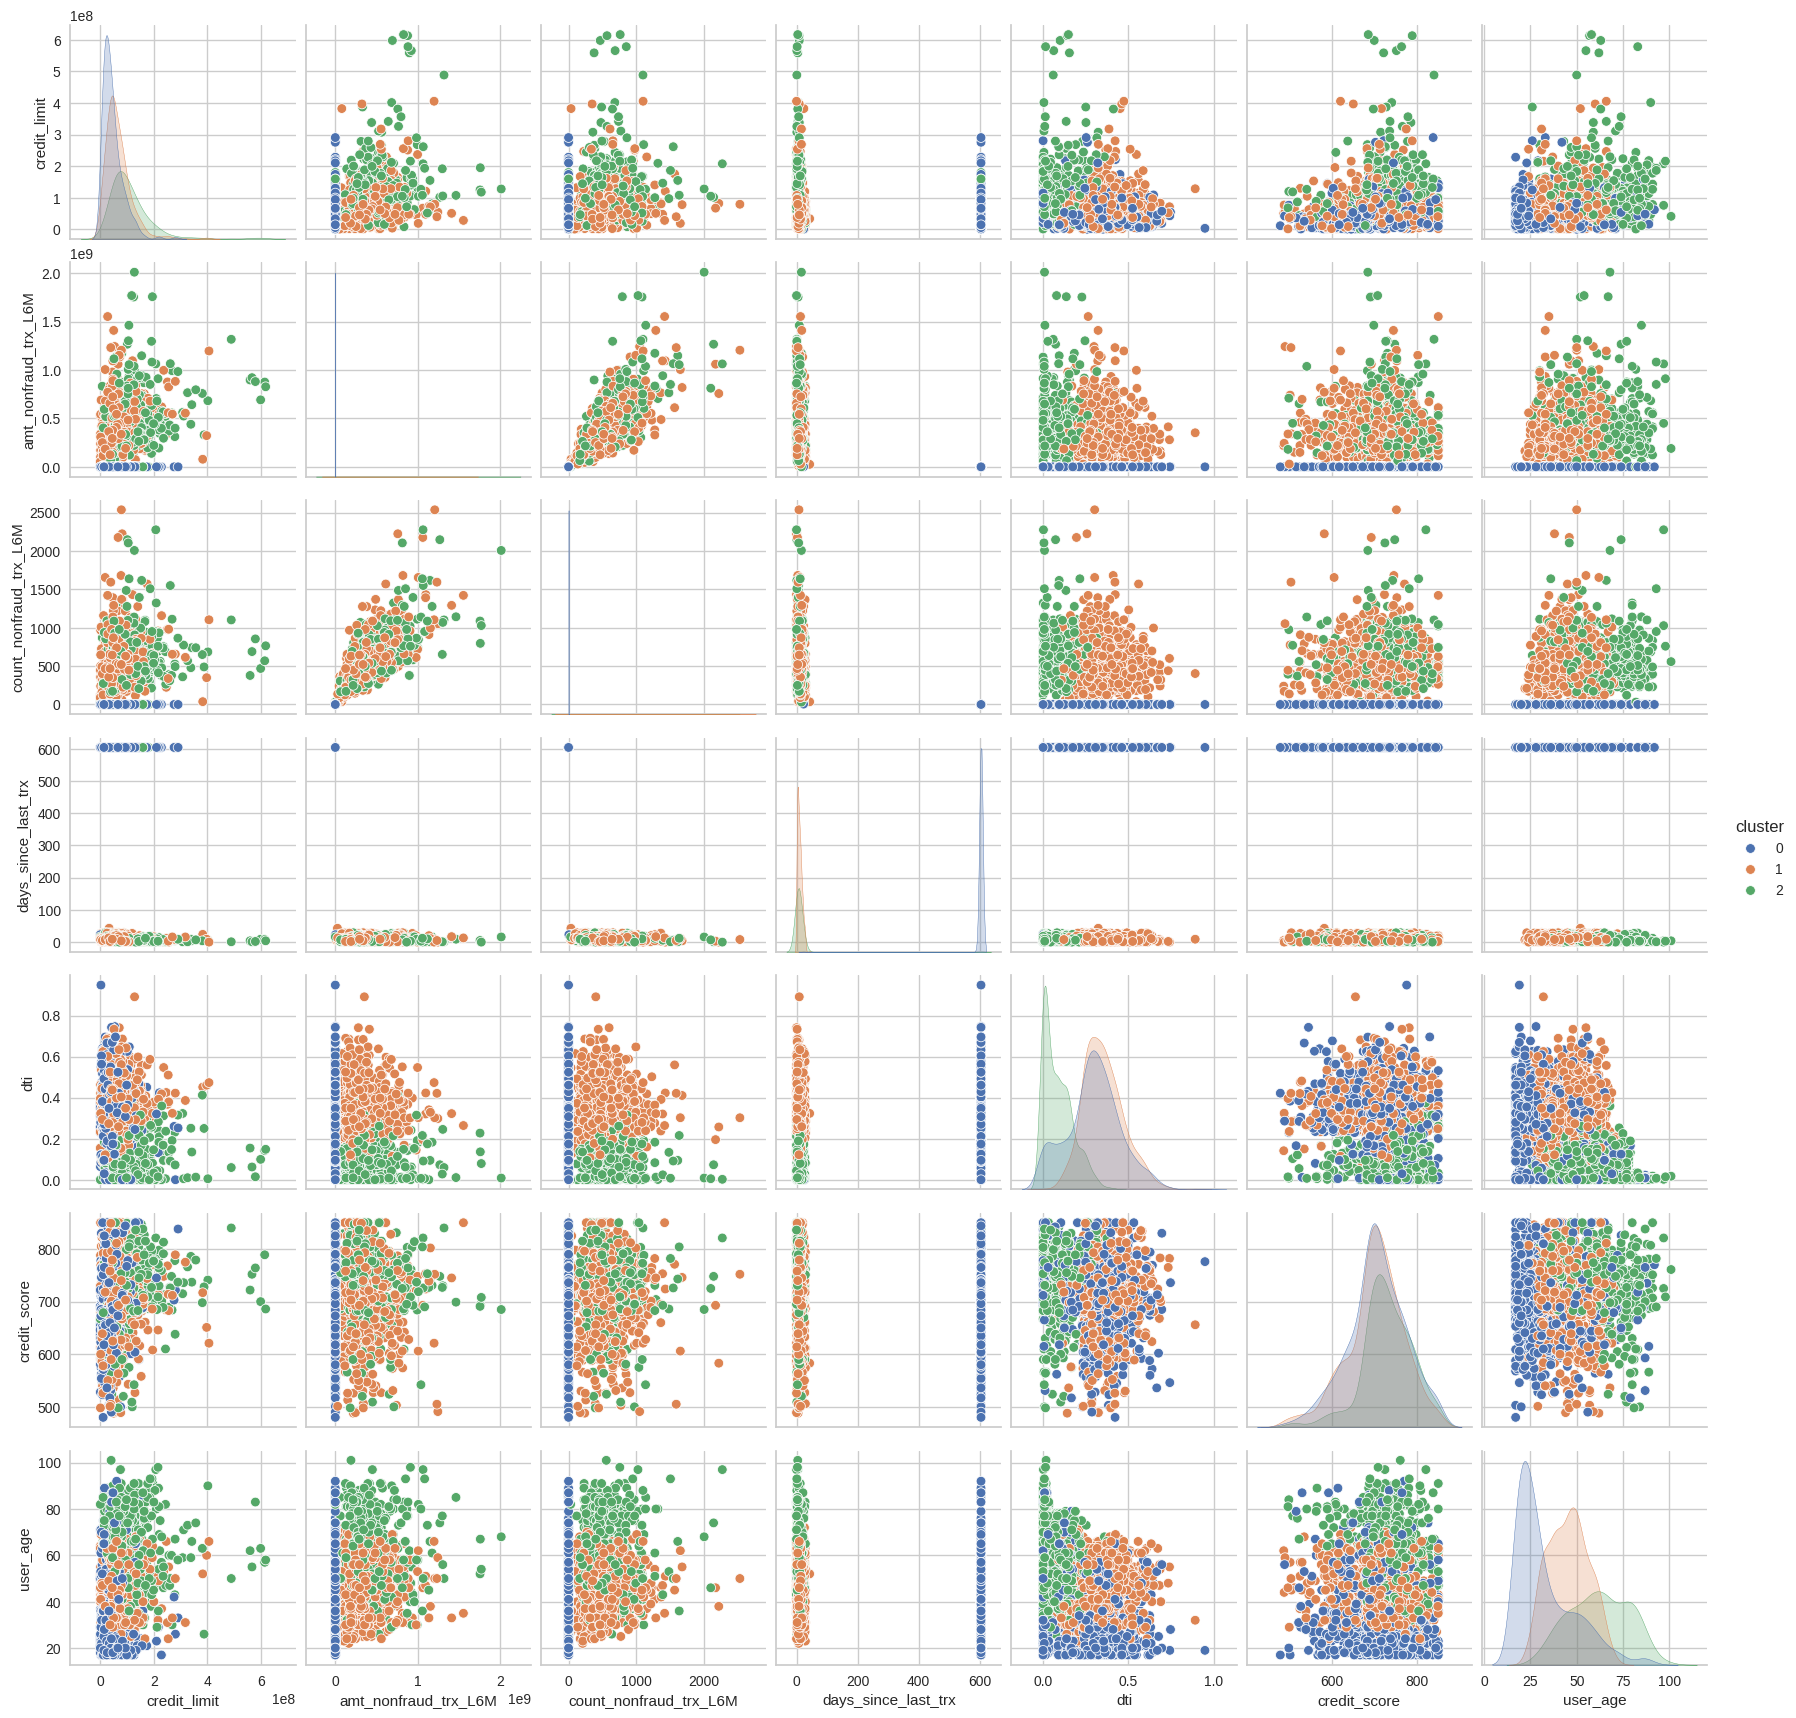

In [72]:
sns.pairplot(df_result, hue='cluster', palette='deep')

In [73]:
#Cluster result summary (average of each feature, per cluster)
pd.set_option('display.float_format', '{:,.3f}'.format)
df_result.groupby('cluster').mean()

credit_limit  amt_nonfraud_trx_L6M  count_nonfraud_trx_L6M  \
cluster                                                                 
0        46,633,795.148             2,259.299                   0.007   
1        67,707,074.605       356,049,637.159                 524.623   
2       112,845,248.497       416,222,871.944                 570.551   

         days_since_last_trx   dti  credit_score  user_age  
cluster                                                     
0                    603.217 0.295       705.442    32.904  
1                      9.934 0.353       701.857    45.433  
2                      9.942 0.087       729.848    62.148

*  *Cluster 2 wins in almost all variables (limit, spending, count, DTI, credit score)*.
*  *Cluster 1 is strong in transaction activity (count & amount) but more risky in terms of credit (DTI & score)*.
*   *Cluster 0 is clearly dormant, young but not generating revenue*.

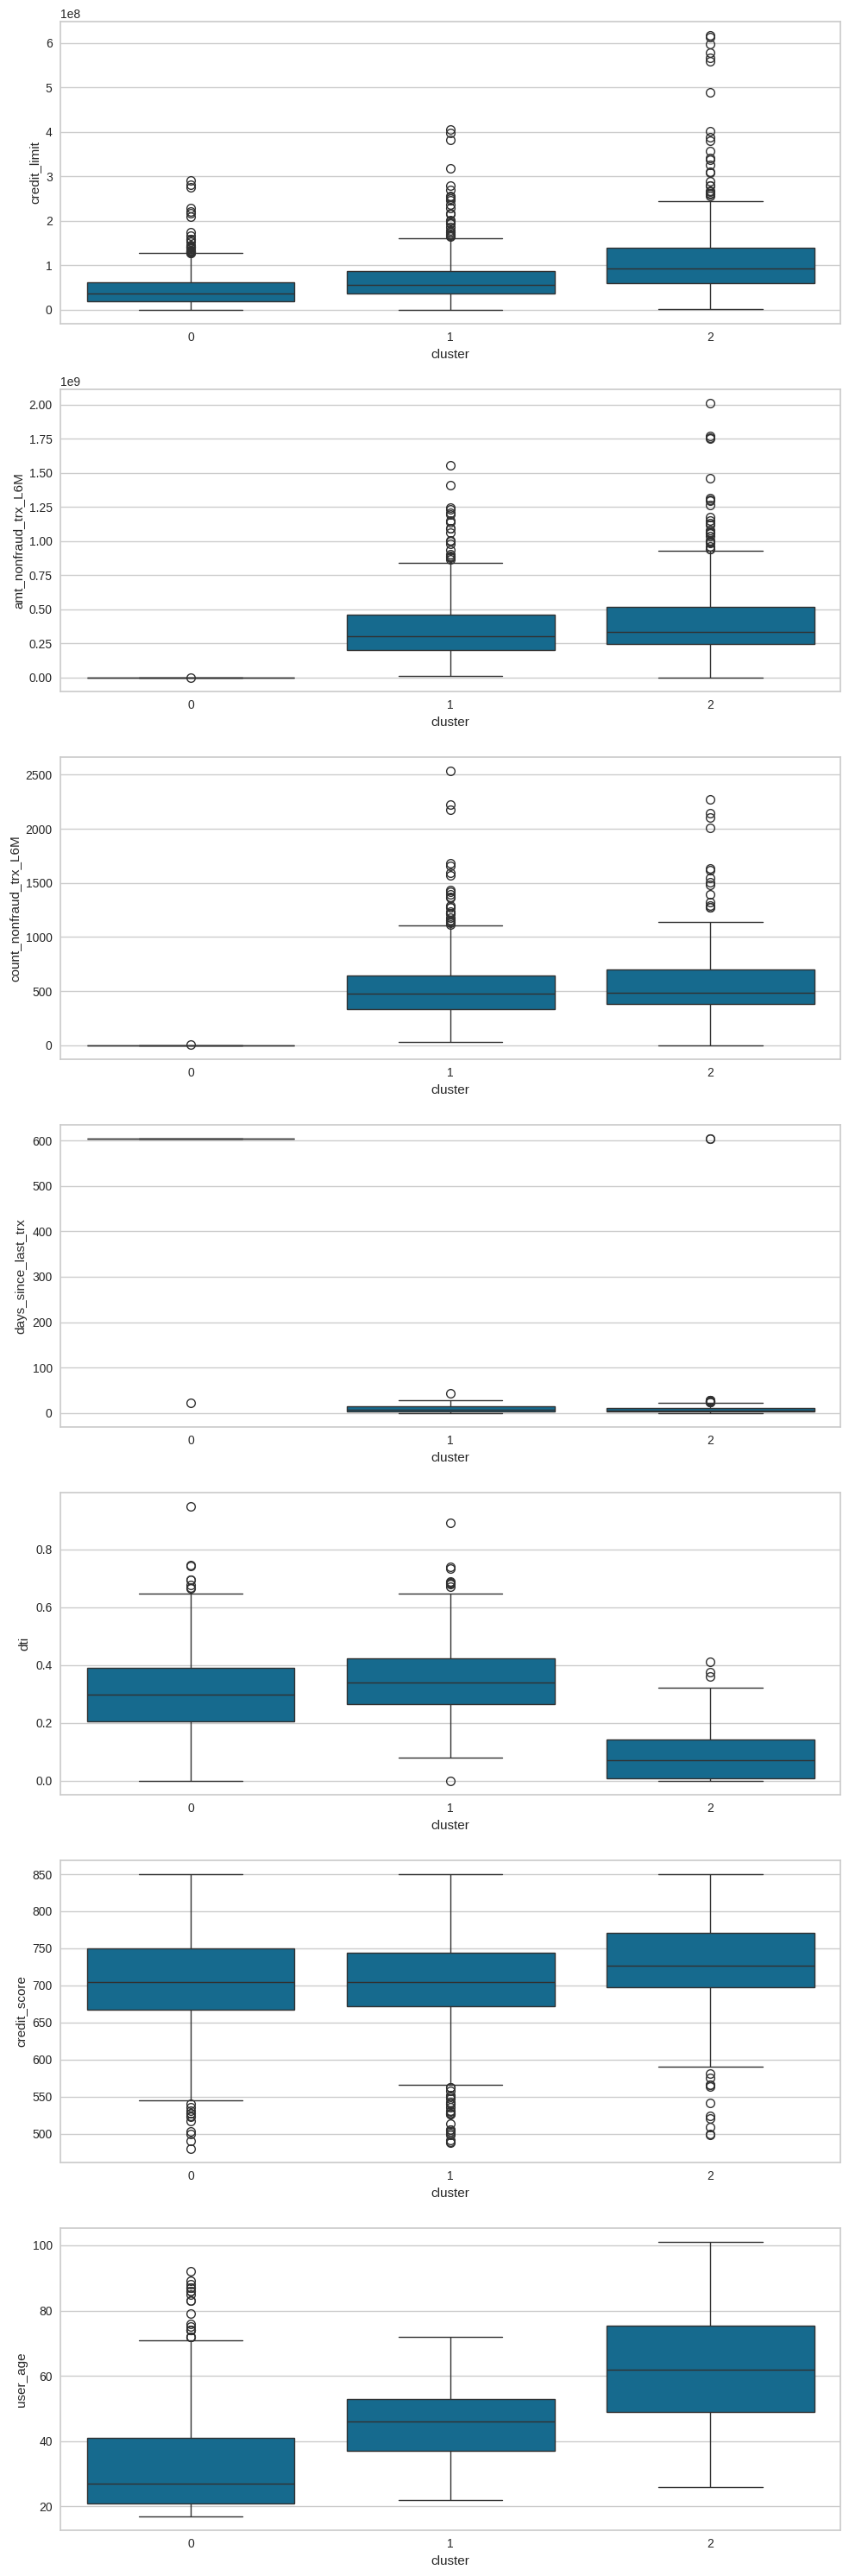

In [74]:
# Plotting the result into boxplot
n_baris = features.shape[1]

fig, axes = plt.subplots(n_baris, 1, figsize=(10,30))

for i, name_kol in enumerate(features.columns) :
  sns.boxplot(df_result, x='cluster', y=name_kol, ax=axes.flatten()[i])

plt.tight_layout()
plt.show()

### Cluster Result Interpretation

The result of customer segmentation:

| Cluster | Credit Limit | Amount Trx | Count Trx | Days Last Trx | DTI | Credit Score | User Age | Segment & Strategy |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
|0|Low|Low|Low|High|Medium-High|Medium|Young|Dormant Young Customers → activation campaign (cashback, welcome bonus), gradual credit limit upgradess|
|1|Mid|High|High|Low|High|Medium|Middle-Aged|Active Risky Spenders → risk control, personalized offers, financial literacy light-touch|
|2|High|High|High|Low|Low|High|Senior|Affluent Senior Customers → premium benefits and loyalty program, cross-selling other bank products|




## Combine Cluster Labels with All Data

In [75]:
final_data["cluster"] = df_result["cluster"]
final_data

user_id  gender   yearly_income     total_debt  credit_score  user_age  \
0        825  Female  93,663,000.000 38,138,095.000           787        52   
1       1746  Female 121,212,000.000 57,186,095.000           701        52   
2       1718  Female  52,535,000.000     58,666.000           698        80   
3        708  Female 392,132,000.000 60,467,238.000           722        62   
4       1164    Male 172,099,000.000 54,946,285.000           675        42   
...      ...     ...             ...            ...           ...       ...   
1933     986    Male  75,328,000.000 26,250,666.000           703        31   
1934    1944  Female  77,474,000.000 31,224,571.000           740        61   
1935     185  Female  48,548,000.000 21,238,666.000           779        46   
1936    1007    Male  85,752,000.000  8,141,142.000           618        65   
1937    1110  Female 103,411,000.000 54,171,238.000           673        20   

       dti  retired_flag    credit_limit  count_nonfraud_trx_L6M  \
0    0.407         False 164,867,000.000                     599   
1    0.472         False 102,033,000.000                     189   
2    0.001          True 209,210,000.000                    1322   
3    0.154         False 558,975,000.000                     378   
4    0.319         False  54,758,000.000                     496   
...    ...           ...             ...                     ...   
1933 0.348         False  95,255,000.000                     630   
1934 0.403         False  79,140,000.000                     521   
1935 0.438         False  45,524,000.000                     644   
1936 0.095          True  14,435,000.000                       0   
1937 0.524         False  66,642,000.000                       0   

      amt_nonfraud_trx_L6M  count_fraud_trx_L6M  amt_fraud_trx_L6M  \
0          755,489,800.000                    1     -7,421,400.000   
1          388,726,600.000                    0              0.000   
2          705,750,600.000                    0              0.000   
3          897,483,900.000                    0              0.000   
4          763,527,700.000                    0              0.000   
...                    ...                  ...                ...   
1933       190,875,200.000                    0              0.000   
1934       337,055,200.000                    2     -3,552,400.000   
1935       293,676,000.000                    0              0.000   
1936                 0.000                    0              0.000   
1937                 0.000                    0              0.000   

      days_since_last_trx credit_score_category  cluster  
0                      10             Very Good        1  
1                      24                  Good        1  
2                       4                  Good        2  
3                       4                  Good        2  
4                      21                  Good        1  
...                   ...                   ...      ...  
1933                    2                  Good        1  
1934                    4             Very Good        1  
1935                    9             Very Good        1  
1936                  604                  Fair        0  
1937                  604                  Good        0  

[1938 rows x 16 columns]

### Gender Distribution by Cluster

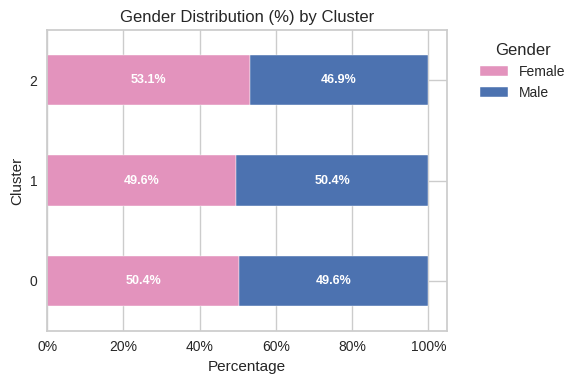

In [76]:
#Checking gender distribution proportion of each cluster
import matplotlib.ticker as mtick

gender_dist = final_data.groupby('cluster')['gender'].value_counts(normalize=True).unstack() * 100

ax = gender_dist.plot(
    kind='barh',
    stacked=True,
    figsize=(6,4),
    color=[ '#e393bd', '#4C72B0']
)

plt.title('Gender Distribution (%) by Cluster')
plt.xlabel('Percentage')
plt.ylabel('Cluster')

ax.xaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(
            p.get_x() + width/2,
            p.get_y() + p.get_height()/2,
            f'{width:.1f}%',
            ha='center', va='center', color='white', fontsize=9, fontweight='bold'
        )

plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

*The gender distribution across clusters appears fairly balanced, indicating that marketing campaigns may not require strong differentiation by gender. Still, gender can serve as an additional lens to enrich campaigns, for example by offering a mix of themes that may resonate with different customer lifestyles.*

### Retired Flag Distribution by Cluster

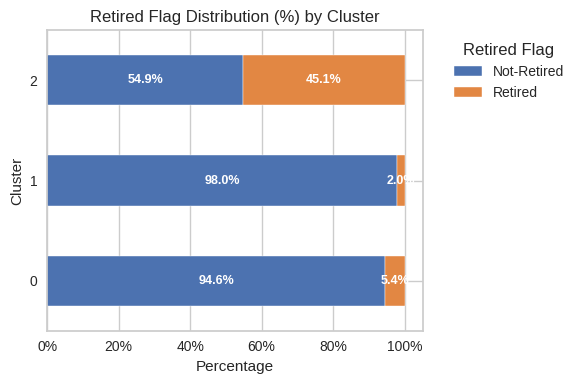

In [79]:
#Checking retired flag distribution proportion of each cluster
import matplotlib.ticker as mtick
final_data['retired_flag'] = final_data['retired_flag'].replace({True: 'Retired', False: 'Not-Retired'})
retired_dist = final_data.groupby('cluster')['retired_flag'].value_counts(normalize=True).unstack() * 100

ax = retired_dist.plot(
    kind='barh',
    stacked=True,
    figsize=(6,4),
    color=['#4C72B0', '#e28743' ]
)

plt.title('Retired Flag Distribution (%) by Cluster')
plt.xlabel('Percentage')
plt.ylabel('Cluster')

ax.xaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(
            p.get_x() + width/2,
            p.get_y() + p.get_height()/2,
            f'{width:.1f}%',
            ha='center', va='center', color='white', fontsize=9, fontweight='bold'
        )

plt.legend(title='Retired Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

*The retired status distribution further validates the existing segmentation, with Clusters 0 and 1 being overwhelmingly non-retired, consistent with their younger and middle-aged profiles. This indicates that activation and growth campaigns remain the primary focus for these segments. Meanwhile, Cluster 2 shows a significant share of retired customers, reinforcing its senior profile and suggesting a dual strategy: maintaining premium benefits for affluent active seniors while offering more stable, retirement-friendly products to engage those already retired.*

## Summary Customer Segmentation

Cluster 0 – Dormant Young Customers (Young cardholders who remain inactive, requiring reactivation strategies)
*   Credit Limit: Low (46,6M)
*   Amount & Count of Transactions: Almost none (very low activity)
*   Days Since Last Transaction: Very high (long inactive (603 days) → dormant)
*   DTI: Medium to High (0,295)
*   Credit Score: Fairly high (705)
*   Age: Younger (32.9 years old)


Cluster 1 – Active Risky Spenders (Highly active spenders with strong contribution, but high risk of default)
*   Credit Limit: Medium (67,7M)
*   Amount & Count of Transactions: High (356M), very active (524 transactions/6 months)
*   Days Since Last Transaction: Low (9 - 10 days)
*   DTI: Quite high (0,353)
*   Credit Score: Medium (701) → risky customers
*   Age: Middle-aged (45,4 years old)

Cluster 2 – Affluent Senior Customers (Wealthy senior customers who are financially healthy, actively transact, low-risk, and highly profitable)
*   Credit Limit: Very high (112,8M)
*   Amount & Count of Transactions: Large (416M) and active (570 transactions/6 months)
*   Days Since Last Transaction: Low (9 - 10 days)
*   DTI: Low (0,087) → financially healthy
*   Credit Score: High (729)
*   Age: Older (62,1 years old)




# Insight & Recommendation

**Insights from Customer Segmentation**

1.  Cluster 0 – Dormant Young Customers
   * Profile: Young, low credit limit, inactive transactions, medium-high DTI, medium credit score.
   * Insight: Currently low contributor to income, but represents future growth potential if successfully activated early.
   * Risk: Medium, mainly due to inactivity and possible churn.

2. Cluster 1 – Active Risky Spenders
   * Profile: Middle-aged, active transactions, high spending, but low-to-medium credit score and high DTI.
   * Insight: This segment offers high revenue potential, but also high default risk.
   * Risk: Needs tight monitoring and risk control to prevent credit losses.

3. Cluster 2 – Affluent Senior Customers
   * Profile: High credit limit, frequent and high-value transactions, low DTI, high credit score, senior age.
   * Insight: This is the most profitable and safest segment. They are financially stable and loyal, contributing significantly to bank income.
   * Risk: Relatively low.


**Business Recommendations**
1. Activate Dormant Young Customers (Cluster 0)
   * Objective: Transform inactive young customers into active card users for long-term profitability.
   * Actions:
      * Launch activation campaigns (cashback, welcome vouchers, gamified rewards for first 3 transactions).
      * Provide low-risk products like installment payment offers or digital wallet integration.
      * Provide step-up credit limit policy to build long-term loyalty.
   * Expected Impact: Increase in card activation and future loyal customer base, although impact on short-term profit is smaller.

2. Selectively Grow Active Risky Spenders (Cluster 1)
   * Objective: Capture more spending from this active group while minimizing default risk.
   * Actions:
     * Apply risk control measures (spending caps, real-time alerts).
     * Offer personalized offers (cashback, lifestyle rewards) to encourage spending but in controlled categories.
     * Provide financial literacy nudges (tips, budgeting tools) to maintain repayment ability while keeping usage high.
   * Expected Impact: Higher transaction volume and fee income, but must be balanced with risk management policies.

3. Focus on Affluent Senior Customers (Cluster 2)
   * Objective: Retain loyalty and increase spending among safest and most profitable segment.
   * Actions:
     * Strengthen premium benefits & loyalty programs (travel rewards, lounge access, exclusive dining).
     * Launch exclusive offers (luxury goods, insurance, investment packages).
     * Cross-sell high-margin financial products (wealth management, deposits, insurance).
   * Expected Impact: Stable increase in spending and cross-product income with minimal credit risk.